---
# Capstone Project - Pneumonia detection
## Final Submission
---

## Background and Motivation

### What is Pneumonia?

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

### Symptoms
The signs and symptoms of pneumonia vary from mild to severe, depending on factors such as the type of germ causing the infection, and your age and overall health. Mild signs and symptoms often are similar to those of a cold or flu, but they last longer.

Signs and symptoms of pneumonia may include:

* Chest pain when you breathe or cough
* Confusion or changes in mental awareness (in adults age 65 and older)
* Cough, which may produce phlegm
* Fatigue
* Fever, sweating and shaking chills
* Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
* Nausea, vomiting or diarrhea
* Shortness of breath

### Detection
If pneumonia is suspected, your doctor may recommend the following tests:

* **Blood tests.** Blood tests are used to confirm an infection and to try to identify the type of organism causing the infection. However, precise identification isn't always possible.

* **Chest X-ray.** This helps your doctor diagnose pneumonia and determine the extent and location of the infection. However, it can't tell your doctor what kind of germ is causing the pneumonia.

* **Pulse oximetry.** This measures the oxygen level in your blood. Pneumonia can prevent your lungs from moving enough oxygen into your bloodstream.

* **Sputum test.** A sample of fluid from your lungs (sputum) is taken after a deep cough and analyzed to help pinpoint the cause of the infection.

Your doctor might order additional tests if you're older than age 65, are in the hospital, or have serious symptoms or health conditions. These may include:

* **CT scan.** If your pneumonia isn't clearing as quickly as expected, your doctor may recommend a chest CT scan to obtain a more detailed image of your lungs.

* **Pleural fluid culture.** A fluid sample is taken by putting a needle between your ribs from the pleural area and analyzed to help determine the type of infection.


### Chest X-ray

Pneumonia can be detected through a chest X-ray.

* The X-ray can show signs of pneumonia such as an **increased opacity in the lung tissue**, which can indicate fluid or inflammation. 

* The chest X-ray can also show characteristic patterns associated with pneumonia, such as the presence of consolidation (an area of the lung that **appears dense and white on the X-ray**), air bronchograms (the appearance of air-filled bronchi within a consolidated area) or pleural effusion (the accumulation of fluid between the lung and the chest wall).

* However, chest X-ray is not always definitive in diagnosing pneumonia and is usually accompanied by other tests such as blood tests and sputum culture to confirm the diagnosis.

### Motivation
Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2015, 920,000 children under the age of 5 died from the disease. In the United States, pneumonia accounts for over 500,000 visits to emergency departments and over 50,000 deaths in 2015 , keeping the ailment on the list of top 10 causes of death in the country.

While common, accurately diagnosing pneumonia is a tall order. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or post-radiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis.

CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR , complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.


## Problem Statement

To build a deep learning algorithm that can detected presence of visual signal of pneumonia using x-ray images of chest. The algorithm needs to automatically locate lung opacities on chest radiographs.

## Dataset

**File descriptions**

* **stage_2_train.csv** - the training set. Contains patientIds and bounding box / target information.

* **stage_2_sample_submission.csv** - a sample submission file in the correct format. Contains patientIds for the test set. Note that the sample submission contains one box per image, but there is no limit to the number of bounding boxes that can be assigned to a given image.

* **stage_2_detailed_class_info.csv** - provides detailed information about the type of positive or negative class for each image.

* **stage_2_train_images.zip** - Contains Dicom images that be used for training the algorithm. These images have target and class mappings available.

* **stage_2_test_images.zip** - Test Dicom images but without Target / Class label mapping





**Data fields**

* **patientId** - A patientId. Each patientId corresponds to a unique image.
* **x**         - the upper-left x coordinate of the bounding box.
* **y**         - the upper-left y coordinate of the bounding box.
* **width**     - the width of the bounding box.
* **height**    - the height of the bounding box.
* **Target**    - the binary Target, indicating whether this sample has evidence of pneumonia.
* **class**     - One of 'Lung Opacity' , 'Normal' or 'No Lung Opacity / Not Normal'

**Image Format**

DICOM® (Digital Imaging and Communications in Medicine) is the international standard to transmit, store, retrieve, print, process, and display medical imaging information.


**References**

   * Mayo Clinic
   
     https://www.mayoclinic.org/diseases-conditions/pneumonia/symptoms-causes/syc-20354204
     
     
   * RSNA Pneumonia Detection on Kaggle - Overview & Data
   
     https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge
      
        

In [ ]:
import sys
#!{sys.executable} -m pip install pandarallel
#!{sys.executable} -m pip install pydicom
#!{sys.executable} -m pip install klib
#!{sys.executable} -m pip install visualkeras
#!{sys.executable} -m pip install pydot
#!{sys.executable} -m pip install pydotplus
#!{sys.executable} -m pip install graphviz

In [ ]:
import numpy as np
import pandas as pd
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
from joblib import Parallel, delayed
import cv2
import math
import random
import os
import shutil
import base64


#dicom image utility
import pydicom as dicom

#imblearn
from imblearn.under_sampling import RandomUnderSampler

#plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.patches import Rectangle
import seaborn as sns
from IPython.core.display import HTML
from IPython.display import Markdown, display
import klib
import visualkeras
import graphviz

#metrics
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

#utils
import zipfile
from glob import glob
from tqdm import tqdm, tqdm_notebook

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample,shuffle

#PCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC


#Deep Learning
import keras
#from kerastuner import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameters
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, Convolution2D
from keras.optimizers import SGD
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_uniform

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [ ]:
#googlecolab / local run flag
googlecolab = False

In [ ]:
#initalize base and data folder.
if googlecolab:
    from google.colab import drive
    drive.mount('/content/drive/')
    base_folder = '/content/drive/MyDrive/PneumoniaDetection'
else:
    base_folder = '.'

data_folder = base_folder + '/data'



# Milestone -1

## 1.)  Import the data
## 2.)  Map training and testing images to its classes
## 3.)  Map training and testing images to its annotations

In [ ]:
def print_markdown(text, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, text)
    display(Markdown(colorstr))

In [ ]:
class DatasetUtils():
    #extract all zip files
    def extractZipFile(self, src_file, dst_folder):
        print(f'Extracting {src_file}...')
        with zipfile.ZipFile(src_file) as zip_file:
            zip_file.extractall(dst_folder)
        print(f'Extracting {src_file}...Done!')
            
    #reads a csv file to a dataframe
    def read_csv(self, csv_file, na_values=None):
        return pd.read_csv(csv_file, na_values=na_values)
    
    #get first n samples from the dataframe
    def get_top_samples(self, df, n=5):
        return df.head(n)
    
    #get n random samples of a dataframe
    def get_random_samples(self, df, n=7):
        return df.sample(n)
    
    #get unique rows in a dataframe for a column
    def get_nunique_rows(self, df, col_name):
        return df[col_name].nunique()
    
    #print head and shape of any dataframe
    def display_head_shape(self, df):
        print(df.head())
        print(f'Shape = {df.shape}\n')
    
    #concat two dataframes on a column value
    def concat_dataframes(self, df1, df2, col_name):
        return pd.concat([df1, df2[col_name]], axis = 1)
    
    #merge two dataframes using a key
    def merge_dataframes(self, df1, df2, col_name):
        return pd.merge(df1, df2, on=col_name, how='left')
    
    #convert a column to int
    def convert_col_to_int(self, df, col_name):
        return df[col_name].astype('int')
    
    #sample and remove those items from the original dataframe
    def sample_and_remove(self, df, n, random_state=None):
        df_sample = df.sample(n=n, replace=False, random_state=random_state)
        df.drop(df_sample.index, inplace=True)
        return df_sample

In [ ]:
class PneumoniaData:
    #init function
    def __init__(self, data_folder_path, datasetutils):
        #DatasetUtils
        self.datasetutils = datasetutils
        #base data folder path
        self.base_data_folder = data_folder_path
        #dataframe pertaining to image mapping with target labels
        self.df_target = None
        #dataframe pertaining to image mapping with annotations
        self.df_annotations = None
        #dataframe that is obtained by merging target and mapping frames
        self.df_merged = None
        #dataframe with image paths and patientid only
        self.df_img_paths = None
        #dataframe with image paths merged
        self.df_merged_img_path = None
        #dataframe with metadata
        self.df_metadata = None
        #finaldataframe with dicom metadata
        self.df_merged_dicom = None
        #final data frame after dropping duplicates. This dataframe can be used for
        #basic CNN as we are not concerned about bounding box
        self.df_merged_dicom_drop_duplicates = None
        
        #contains mapping between images in test folder with it's path and metadata.
        #we dont have Target / class information. We can only use this for 
        #prediction but can't really use it for validating ground truth vs prediction
        self.df_test_data = None
        
        #pre-processed image
        self.processed_images = dict()
        self.image_width = 128
        self.image_height = 128
        
        
    #resolve a full path by combining base folder
    def getPath(self, file):
        return self.base_data_folder + "/" + file
    
    #extract training and test images
    def extract_train_test_images(self, train_img_zip_file, train_img_folder, 
                                  test_img_zip_file, test_img_folder):
        
        self.datasetutils.extractZipFile(self.getPath(train_img_zip_file), self.getPath(train_img_folder))
        self.datasetutils.extractZipFile(self.getPath(test_img_zip_file), self.getPath(test_img_folder))
        
    #load csv files to dataframe. it loads both  the target mapping as well as annotation mapping files
    def load_data(self, csv_target_mapping, csv_annotation_mapping):
        self.df_target = self.datasetutils.read_csv(self.getPath(csv_target_mapping))
        self.df_annotations = self.datasetutils.read_csv(self.getPath(csv_annotation_mapping))
        self.df_annotations['class'] = self.df_annotations['class'].str.replace('/','|')
        
    #merge the mappings onto one dataframe
    def merge_mappings(self):
        self.df_merged = self.datasetutils.concat_dataframes(self.df_target, 
                                                            self.df_annotations,
                                                            'class')
        
    
    #merge image paths to the dataframe
    def merge_image_paths(self, image_path):
        img_path = self.getPath(image_path)
        
        self.df_img_paths = pd.DataFrame({'image_path': glob(os.path.join(img_path, '*.dcm'))})
        if googlecolab:
            self.df_img_paths['patientId'] = self.df_img_paths.image_path.apply(lambda x:os.path.splitext(os.path.basename(x))[0])
        else:
            self.df_img_paths['patientId'] = self.df_img_paths.image_path.parallel_apply(lambda x:os.path.splitext(os.path.basename(x))[0])
            
        self.df_merged_img_path = self.datasetutils.merge_dataframes(self.df_merged, self.df_img_paths, 'patientId')
    
    
    
    def move_file_to_class_folder(self, row):
        path = row['image_path']
        sub_folder = row['class']
    
        base_directory = os.path.dirname(path)
        file_name = os.path.basename(path)
        new_file_path = os.path.join(base_directory, sub_folder, file_name)
    
        shutil.copy(path, new_file_path)
    
        return new_file_path

    def organize_images_by_class(self, image_path):
        img_path = self.getPath(image_path)
        
        sub_folders = self.df_merged_img_path['class'].unique()
        for sub_folder in sub_folders:
            path = os.path.join(img_path, sub_folder)
            if not os.path.exists(path):
                os.mkdir(path)
                
        
        self.df_merged_img_path['image_path'] = self.df_merged_img_path.parallel_apply(lambda row: self.move_file_to_class_folder(row), axis =1)


        
    #gets metadata from the dicom file. this function is used by merge_metadata as a lamda function
    def populate_metadata(self, image_path):
        data_img = dicom.read_file(image_path)
        patientid = data_img.PatientID
        sex = data_img.PatientSex
        age = int(data_img.PatientAge)
        bodypartexamined = data_img.BodyPartExamined
        viewposition = data_img.ViewPosition
        modality = data_img.Modality
        
        return pd.Series([patientid, sex, age, bodypartexamined, viewposition, modality], 
                         index =['patientId', 'sex', 'age', 'bodypartexamined', 'viewpos', 'modality'])
    
    #merges the image metadata with the dataframe
    def merge_metadata(self):
        if googlecolab:
            self.df_metadata = self.df_img_paths.apply(lambda row: self.populate_metadata(row.image_path), axis=1)
        else:
            self.df_metadata = self.df_img_paths.parallel_apply(lambda row: self.populate_metadata(row.image_path), axis=1)
        self.df_merged_dicom = self.datasetutils.merge_dataframes(self.df_merged_img_path, 
                                                             self.df_metadata, 'patientId')
        
    #maps the test images to patient id and gets all the required metadata
    #note we don't have Target / class information for these test images
    def populate_test_data(self, test_image_path):
        test_image_path = self.getPath(test_image_path)
        
        df_test_data = pd.DataFrame({'image_path': glob(os.path.join(test_image_path, '*.dcm'))})
        if googlecolab:
            df_test_data['patientId'] = df_test_data.image_path.apply(lambda x:os.path.splitext(os.path.basename(x))[0])
            df_test_metadata = df_test_data.apply(lambda row: self.populate_metadata(row.image_path), axis=1)
        else:
            df_test_data['patientId'] = df_test_data.image_path.parallel_apply(lambda x:os.path.splitext(os.path.basename(x))[0])
            df_test_metadata = df_test_data.parallel_apply(lambda row: self.populate_metadata(row.image_path), axis=1)
            
            
        
        self.df_test_data = self.datasetutils.merge_dataframes(df_test_data, df_test_metadata, 'patientId')
        
            
    
    #drops duplicate patient id rows pertaining to different bounding boxes
    def drop_duplicate_patient_rows(self):
        self.df_merged_dicom_drop_duplicates = self.df_merged_dicom.drop_duplicates(subset='patientId', keep="first")
        
    #returns a dicom file as an object
    def read_dicom_file(self, image_path):
        return dicom.read_file(image_path)
        
    #pre process all images and store vector in dictionary
    def pre_process_images(self, pre_process_func):
        self.df_merged_dicom_drop_duplicates['image_array'] = self.df_merged_dicom_drop_duplicates.parallel_apply(lambda row: pre_process_func(row['image_path']), axis=1)
        
    #get random samples from the data with filters of viewpos and impression. Note that
    #we might have multiple bounding boxes for a patientId when penumonia is detected
    
    def get_data_for_samples(self, samples):
        samples_dict = dict()
        
        for index, sample in samples.iterrows():
            patientId = sample['patientId']
            
            samples_dict[patientId] = dict()
            samples_dict[patientId]['age'] = sample['age']
            samples_dict[patientId]['gender'] = sample['sex']
            samples_dict[patientId]['impression'] = sample['class']
            samples_dict[patientId]['is_positive'] = sample['Target']
            samples_dict[patientId]['viewpos'] = sample['viewpos']
            samples_dict[patientId]['image_path'] = sample['image_path']
            
            if math.isnan(sample['width']) == False:
                samples_dict[patientId]['bounding_box'] = list()
                rows = self.df_merged_dicom[self.df_merged_dicom['patientId'] == patientId]
                for i, row in rows.iterrows():
                    bounding_box = dict()
                    bounding_box['x'] = row['x']
                    bounding_box['y'] = row['y']
                    bounding_box['width'] = row['width']
                    bounding_box['height'] = row['height']
                    samples_dict[patientId]['bounding_box'].append(bounding_box)
            
        return samples_dict
        
    def get_random_samples(self, view_pos, impression, count=3):
        #first get random samples
        samples = self.df_merged_dicom[(self.df_merged_dicom['viewpos'] == view_pos) & 
                                        (self.df_merged_dicom['class'] == impression)].sample(count)
        
        return self.get_data_for_samples(samples)
        
        
                    
                    
    #Gets images and target labels
    def get_images_labels(self):
        X = self.df_merged_dicom_drop_duplicates.drop('Target', axis=1)
        y = self.df_merged_dicom_drop_duplicates['Target']
        
        return np.array(X['image_array'].values.tolist()), np.array(y)
    
        
    #Get balanced data by undersampling in the following way:
    #Remove the images from the class 'No Lung Opacity | Not Normal'
    #Use RandomUnderSampler from imblearn to undersample majority class
    def get_images_labels_undersampled(self):
        df_pruned = self.df_merged_dicom_drop_duplicates[self.df_merged_dicom_drop_duplicates['class'] != 'No Lung Opacity | Not Normal']
        X = df_pruned.drop('Target', axis=1)
        y = df_pruned['Target']
        rus = RandomUnderSampler()
        X_resampled, y_resampled = rus.fit_resample(X, y)
        
        return np.array(X_resampled['image_array'].values.tolist()), np.array(y_resampled)
            

In [ ]:
datasetutils = DatasetUtils()

def _import_data(datasetutils, extract_zip=False):
    print(f'Importing data ...\n')
    #Init PneumoniaData instance
    pneumonia_data = PneumoniaData(data_folder, datasetutils)
    #extract images from training and test folder
    if extract_zip:
        pneumonia_data.extract_train_test_images('stage_2_train_images.zip', '', 'stage_2_test_images.zip', '')
    #load csv files
    print(f'Loading stage_2_train_labels and stage_2_detailed_class_info to a dataframe...\n')
    pneumonia_data.load_data('stage_2_train_labels.csv', 'stage_2_detailed_class_info.csv')    
    #merge the above two data frames
    print(f'Merging stage_2_train_labels and stage_2_detailed_class_info into a dataframe...\n')
    print(f'Importing data ...Done!!\n')
    pneumonia_data.merge_mappings()
    
    return pneumonia_data
    
def _map_images():
    print(f'Mapping images ...\n')
    #merge image paths to the above merged dataframe
    print(f'Loading and merging the image path data onto the dataframe...\n')
    pneumonia_data.merge_image_paths('stage_2_train_images')
    #move images to sub folders as per it's class
    print(f"Moving the images to it's respective class sub folders and mapping the same in the dataframe...\n")
    pneumonia_data.organize_images_by_class('stage_2_train_images')
    #merge dicom metadata
    print(f'Loading and merging the dicom image metadata onto the dataframe...\n')
    pneumonia_data.merge_metadata()
    print(f'Mapping test images to its path and metadata....\n')
    pneumonia_data.populate_test_data('stage_2_test_images')
    print(f'Mapping images ...Done!\n')
    
def _clean_dataframe():
    pneumonia_data.drop_duplicate_patient_rows()
    print(f'Created a dataframe without duplicate patientId pertaining to multiple bounding boxes!\n')

In [ ]:
pneumonia_data = _import_data(datasetutils, extract_zip=False)

Importing data ...

Loading stage_2_train_labels and stage_2_detailed_class_info to a dataframe...

Merging stage_2_train_labels and stage_2_detailed_class_info into a dataframe...

Importing data ...Done!!



In [ ]:
_map_images()

Mapping images ...

Loading and merging the image path data onto the dataframe...



Moving the images to it's respective class sub folders and mapping the same in the dataframe...



Loading and merging the dicom image metadata onto the dataframe...



Mapping test images to its path and metadata....



Mapping images ...Done!



In [ ]:
_clean_dataframe()

Created a dataframe without duplicate patientId pertaining to multiple bounding boxes!



In [ ]:
class EdaTools():
    def print_df_details(self, df, key_col, text):
        display(df.head())
        print(f'{text} has {df.shape[0]} rows and {df.shape[1]} columns\n')
        n_unique = datasetutils.get_nunique_rows(df, key_col)
        n_duplicates = df.shape[0] - n_unique
        print(f'{text} has {n_unique} unique rows\n')
        print(f'{text} has {n_duplicates} duplicate rows\n')
        print(f'Datatypes...\n')
        display(df.dtypes)
        null_values_percent = ((df.isnull() | df.isna() | df.eq('')).sum() * 100 / df.index.size).round(2)
        print(f'NULL Value count as %...\n')
        display(null_values_percent)
        
    #Plot a count plot for a col given hue
    def plot_count(self, title, df, col_name, hue_col_name):
        plt.rcParams['figure.figsize']=[15,10]
        sns.countplot(data=df, x=col_name, hue=hue_col_name)
        plt.title(title)
        plt.xticks(rotation=90)
        plt.show()
    
    #Plot a single pie chart for a categorical column
    def plot_piechart(self, title, df, col_name, labels=None):
        figure(figsize=(9, 7), dpi=80)
        if labels is not None:
            df[col_name].value_counts().plot.pie(autopct='%.2f%%', labels = labels)
        else:
            df[col_name].value_counts().plot.pie(autopct='%.2f%%')
        plt.title(title)
        plt.show()
        
    #Plot pie chart with unique values from np array
    def plot_piechart_nparray(self, title, arr, labels=None):
        figure(figsize=(9, 7), dpi=80)
        unique, counts = np.unique(arr, return_counts=True)
        plt.pie(counts, labels=unique, autopct='%1.1f%%')
        plt.title(title)
        plt.show()
    
    #Plot distribution
    def plot_distribution_with_stats(self, df, col_name):
        klib.dist_plot(df[col_name])
        
    #plot histogram
    def plot_histogram(self, df, col_name, title, x_label, y_label, color='blue'):
        figure(figsize=(9, 7), dpi=80)
        plt = sns.distplot(df[col_name], hist=True, kde=False, color=color)
        plt.set_title(title)
        plt.set_ylabel(x_label)
        plt.set_ylabel(y_label)
    
    #plot kde
    def plot_kde(self, df, col_name, title, x_label):
        figure(figsize=(9, 7), dpi=80)
        plt = sns.displot(data=df, x=x_label, hue=col_name, kind='kde', 
                          fill=True, 
                          height=5, aspect=1.5)
        
    #scatter plot
    def plot_scatter(self, title, x_label, y_label, df, x_col, y_col, hue_col=None):
        figure(figsize=(9, 7), dpi=80)
        sns.scatterplot(x=x_col, y=y_col, data=df, hue=hue_col)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()
        
    #plot distribution
    def plot_distribution(self, df, x_col, hue_col, title, x_label, y_label, kind='hist'):
        figure(figsize=(9, 7), dpi=80)
        sns.displot(data = df, x=x_col, hue=hue_col, kind=kind)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()
        
        
        
edatools = EdaTools()    

### CSV data of labels
This dataframe has been loaded from the file 'stage_2_train_labels.csv'

In [ ]:
edatools.print_df_details(pneumonia_data.df_target, 'patientId', "stage_2_train_labels")

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

stage_2_train_labels has 30227 rows and 6 columns

stage_2_train_labels has 26684 unique rows

stage_2_train_labels has 3543 duplicate rows

Datatypes...



patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
dtype: object

NULL Value count as %...



patientId     0.00
x            68.39
y            68.39
width        68.39
height       68.39
Target        0.00
dtype: float64

### CSV Data of Annotations
This dataframe has been loaded from the file 'stage_2_detailed_class_info.csv'

In [ ]:
edatools.print_df_details(pneumonia_data.df_annotations, 'patientId', "stage_2_detailed_class_info")

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity | Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity | Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity | Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

stage_2_detailed_class_info has 30227 rows and 2 columns

stage_2_detailed_class_info has 26684 unique rows

stage_2_detailed_class_info has 3543 duplicate rows

Datatypes...



patientId    object
class        object
dtype: object

NULL Value count as %...



patientId    0.0
class        0.0
dtype: float64

### CSV of labels and annotations merged

In [ ]:
edatools.print_df_details(pneumonia_data.df_merged, 'patientId', "merged dataframe of labels and class")

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity | Not Normal  
1  No Lung Opacity | Not Normal  
2  No Lung Opacity | Not Normal  
3                        Normal  
4                  Lung Opacity

merged dataframe of labels and class has 30227 rows and 7 columns

merged dataframe of labels and class has 26684 unique rows

merged dataframe of labels and class has 3543 duplicate rows

Datatypes...



patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
class         object
dtype: object

NULL Value count as %...



patientId     0.00
x            68.39
y            68.39
width        68.39
height       68.39
Target        0.00
class         0.00
dtype: float64

### Dataframe of training images path and their corresponding patientId
This dataframe is created by iterating through training images and mapping the patientId with the corresponding path to the x-ray image

In [ ]:
edatools.print_df_details(pneumonia_data.df_img_paths, 'patientId', "dataframe of patientId and image path")

image_path  \
0  ./data/stage_2_train_images/7be6b4de-afe9-43c0...   
1  ./data/stage_2_train_images/2dcdd159-2889-48d3...   
2  ./data/stage_2_train_images/d8e66874-305e-4c80...   
3  ./data/stage_2_train_images/22f2d3ec-f7ea-4778...   
4  ./data/stage_2_train_images/cdaa07d4-4234-4cd2...   

                              patientId  
0  7be6b4de-afe9-43c0-a581-0f49608c8976  
1  2dcdd159-2889-48d3-a0ce-5c7b1086c49d  
2  d8e66874-305e-4c80-9b75-5e764eb718ff  
3  22f2d3ec-f7ea-4778-850d-bb111590202f  
4  cdaa07d4-4234-4cd2-b9bf-abbf5aed1bb4

dataframe of patientId and image path has 26684 rows and 2 columns

dataframe of patientId and image path has 26684 unique rows

dataframe of patientId and image path has 0 duplicate rows

Datatypes...



image_path    object
patientId     object
dtype: object

NULL Value count as %...



image_path    0.0
patientId     0.0
dtype: float64

### Merged dataframe with labels, class and image paths

In [ ]:
edatools.print_df_details(pneumonia_data.df_merged_img_path, 'patientId', "Merged dataframe of labels, class and image paths")

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity | Not Normal   
1  No Lung Opacity | Not Normal   
2  No Lung Opacity | Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path  
0  ./data/stage_2_train_images/No Lung Opacity | ...  
1  ./data/stage_2_train_images/No Lung Opacity | ...  
2  ./data/stage_2_train_images/No Lung Opacity | ...  
3  ./data/stage_2_train_images/Normal/003d8fa0-6b...  
4  ./data/stage_2_train_images/Lung Opacity/00436...

Merged dataframe of labels, class and image paths has 30227 rows and 8 columns

Merged dataframe of labels, class and image paths has 26684 unique rows

Merged dataframe of labels, class and image paths has 3543 duplicate rows

Datatypes...



patientId      object
x             float64
y             float64
width         float64
height        float64
Target          int64
class          object
image_path     object
dtype: object

NULL Value count as %...



patientId      0.00
x             68.39
y             68.39
width         68.39
height        68.39
Target         0.00
class          0.00
image_path     0.00
dtype: float64

### Dataframe of image metadata
This dataframe was created by iterating over all images in a parallel manner using pandas parallel apply and reading the Dicom metadata. We are loading on some of the metadata like age, sex, body part examined, view position and modality

In [ ]:
dicom_file = pneumonia_data.read_dicom_file(pneumonia_data.df_merged_img_path.iloc[0].image_path)

In [ ]:
display(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
edatools.print_df_details(pneumonia_data.df_metadata, 'patientId', "Metadata dataframe")

patientId sex  age bodypartexamined viewpos  \
0  7be6b4de-afe9-43c0-a581-0f49608c8976   F   35            CHEST      PA   
1  2dcdd159-2889-48d3-a0ce-5c7b1086c49d   F   54            CHEST      PA   
2  d8e66874-305e-4c80-9b75-5e764eb718ff   M   68            CHEST      AP   
3  22f2d3ec-f7ea-4778-850d-bb111590202f   F   70            CHEST      PA   
4  cdaa07d4-4234-4cd2-b9bf-abbf5aed1bb4   M   56            CHEST      AP   

  modality  
0       CR  
1       CR  
2       CR  
3       CR  
4       CR

Metadata dataframe has 26684 rows and 6 columns

Metadata dataframe has 26684 unique rows

Metadata dataframe has 0 duplicate rows

Datatypes...



patientId           object
sex                 object
age                  int64
bodypartexamined    object
viewpos             object
modality            object
dtype: object

NULL Value count as %...



patientId           0.0
sex                 0.0
age                 0.0
bodypartexamined    0.0
viewpos             0.0
modality            0.0
dtype: float64

In [ ]:
pneumonia_data.df_metadata.viewpos.value_counts()

PA    14511
AP    12173
Name: viewpos, dtype: int64

In [ ]:
pneumonia_data.df_metadata.bodypartexamined.value_counts()

CHEST    26684
Name: bodypartexamined, dtype: int64

In [ ]:
pneumonia_data.df_metadata.modality.value_counts()

CR    26684
Name: modality, dtype: int64

**Observations:**

    1. Based on the header metadata of the Dicom file, we picked sex, age, body part examined, view position and
       and modality.
    2. body part examined we confirmed above is always 'CHEST'. Just to make sure we have clean data
    3. Modality is also 'CR' which stands for Computed Radiography.
    4. View position is 'PA' or 'AP'which stands for 'posteroanterior' and 'anteroposterior' respectively
    5. PA view is good in detecting Pneumonia in lungs as it gets a clear picture from the back
    6. AP view is good in detecting pleural effusion that appears as lung opacityin CXR
    7. We have slightly more number of PA images than that of AP images

### Final merged dataframe
This dataframe combines bounding boxes, labels, classes, image paths, image metadata

In [ ]:
edatools.print_df_details(pneumonia_data.df_merged_dicom, 'patientId', "Final combined dataframe")

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity | Not Normal   
1  No Lung Opacity | Not Normal   
2  No Lung Opacity | Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path sex  age  \
0  ./data/stage_2_train_images/No Lung Opacity | ...   F   51   
1  ./data/stage_2_train_images/No Lung Opacity | ...   F   48   
2  ./data/stage_2_train_images/No Lung Opacity | ...   M   19   
3  ./data/stage_2_train_images/Normal/003d8fa0-6b...   M   28   
4  ./data/stage_2_train_images/Lung Opacity/00436...   F   32   

  bodypartexamined viewpos modality  
0            CHEST      PA       CR  
1            CHEST      PA       CR  
2            CHEST      AP       CR  
3            CHEST      PA       CR  
4            CHEST      AP       CR

Final combined dataframe has 30227 rows and 13 columns

Final combined dataframe has 26684 unique rows

Final combined dataframe has 3543 duplicate rows

Datatypes...



patientId            object
x                   float64
y                   float64
width               float64
height              float64
Target                int64
class                object
image_path           object
sex                  object
age                   int64
bodypartexamined     object
viewpos              object
modality             object
dtype: object

NULL Value count as %...



patientId            0.00
x                   68.39
y                   68.39
width               68.39
height              68.39
Target               0.00
class                0.00
image_path           0.00
sex                  0.00
age                  0.00
bodypartexamined     0.00
viewpos              0.00
modality             0.00
dtype: float64

### Final merged dataframe without duplicates
This dataframe is the final dataframe without duplicate patientIds. As we have observed, we have several rows 
in some cases when class = 'Lung Opacity'. Technically they are not duplicates ; they are present to depict multiple bounding boxe per image if they exist. 

While doing Basic CNN and also see patient class distribution it is important to have a dataframe that contains
only one record per patient.

In [ ]:
edatools.print_df_details(pneumonia_data.df_merged_dicom_drop_duplicates, 'patientId', 
                          "Final combined dataframe without repeating patientIds")

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity | Not Normal   
1  No Lung Opacity | Not Normal   
2  No Lung Opacity | Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path sex  age  \
0  ./data/stage_2_train_images/No Lung Opacity | ...   F   51   
1  ./data/stage_2_train_images/No Lung Opacity | ...   F   48   
2  ./data/stage_2_train_images/No Lung Opacity | ...   M   19   
3  ./data/stage_2_train_images/Normal/003d8fa0-6b...   M   28   
4  ./data/stage_2_train_images/Lung Opacity/00436...   F   32   

  bodypartexamined viewpos modality  
0            CHEST      PA       CR  
1            CHEST      PA       CR  
2            CHEST      AP       CR  
3            CHEST      PA       CR  
4            CHEST      AP       CR

Final combined dataframe without repeating patientIds has 26684 rows and 13 columns

Final combined dataframe without repeating patientIds has 26684 unique rows

Final combined dataframe without repeating patientIds has 0 duplicate rows

Datatypes...



patientId            object
x                   float64
y                   float64
width               float64
height              float64
Target                int64
class                object
image_path           object
sex                  object
age                   int64
bodypartexamined     object
viewpos              object
modality             object
dtype: object

NULL Value count as %...



patientId            0.00
x                   77.47
y                   77.47
width               77.47
height              77.47
Target               0.00
class                0.00
image_path           0.00
sex                  0.00
age                  0.00
bodypartexamined     0.00
viewpos              0.00
modality             0.00
dtype: float64

### Test dataframe
This dataframe is created by mapping images in stage_2_test_images.zip. **This does not contain Target or class information and hence won't be used for training and validation.** Just exploring the data of the same as we can use it at later stage for just doing predictions after our model is built.

This dataframe is built by parsing the test image folder, populating its path and mapping the same to patientId
and also extracting and populating metadata for each patient CXR in this folder

In [ ]:
edatools.print_df_details(pneumonia_data.df_test_data, 'patientId', 
                          "Test images with without Target or Class information")

image_path  \
0  ./data/stage_2_test_images/2392af63-9496-4e72-...   
1  ./data/stage_2_test_images/2ce40417-1531-4101-...   
2  ./data/stage_2_test_images/2bc0fd91-931a-446f-...   
3  ./data/stage_2_test_images/29d42f45-5046-4112-...   
4  ./data/stage_2_test_images/208e3daf-18cb-4bf7-...   

                              patientId sex  age bodypartexamined viewpos  \
0  2392af63-9496-4e72-b348-9276432fd797   M   50            CHEST      PA   
1  2ce40417-1531-4101-be24-e85416c812cc   F   67            CHEST      PA   
2  2bc0fd91-931a-446f-becb-7a6d3f2a7678   M   47            CHEST      PA   
3  29d42f45-5046-4112-87fa-18ea6ea97e75   M   60            CHEST      PA   
4  208e3daf-18cb-4bf7-8325-0acf318ed62c   F   34            CHEST      PA   

  modality  
0       CR  
1       CR  
2       CR  
3       CR  
4       CR

Test images with without Target or Class information has 3000 rows and 7 columns

Test images with without Target or Class information has 3000 unique rows

Test images with without Target or Class information has 0 duplicate rows

Datatypes...



image_path          object
patientId           object
sex                 object
age                  int64
bodypartexamined    object
viewpos             object
modality            object
dtype: object

NULL Value count as %...



image_path          0.0
patientId           0.0
sex                 0.0
age                 0.0
bodypartexamined    0.0
viewpos             0.0
modality            0.0
dtype: float64

## Exploratory Data Analysis

### EDA - Visualization of Target
We will visualize the dataset in its totality and another one where each row represents one patient.

In [ ]:
pneumonia_data.df_merged_dicom['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

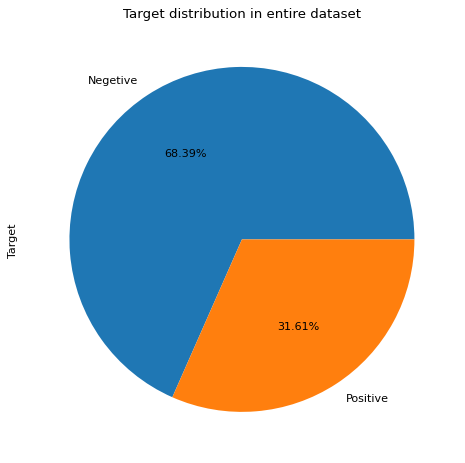

In [ ]:
edatools.plot_piechart("Target distribution in entire dataset", pneumonia_data.df_merged_dicom, 
                       'Target', labels=["Negetive", "Positive"])

In [ ]:
pneumonia_data.df_merged_dicom_drop_duplicates['Target'].value_counts()

0    20672
1     6012
Name: Target, dtype: int64

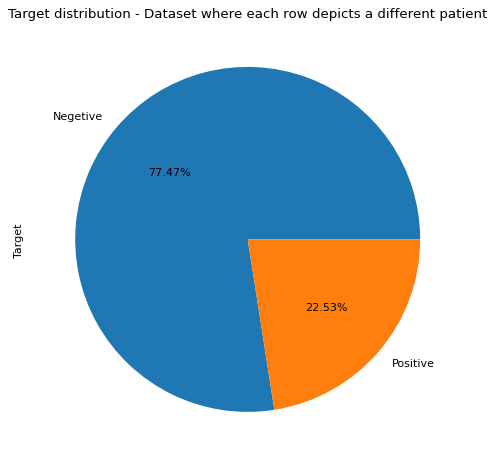

In [ ]:
edatools.plot_piechart("Target distribution - Dataset where each row depicts a different patient", pneumonia_data.df_merged_dicom_drop_duplicates, 
                       'Target', labels=["Negetive", "Positive"])

**Observations on Target column:**

    Entire dataset:
        1. Entire dataset contains 31.61% samples as Pneumonia positive rows while 68.39% contains Pneumonia
           negetive rows.
        2. The 31.61% **does not** depict the propotion of people having Pneumonia as when Pneumonia is detected
           there could be multiple rows for a patient depiciting different x,y, width and height for bounding box.
           
    Dataset where each row represents only one patient:
        1. 22.53% of the patients have Pneumonia in our dataset while 77.47% don't seem to have the same.
        2. Out of the 77.47% of people, there is a chunk of people who may not have Pneumonia but still they 
           don't have normal lungs. This is further captured when we plot the class details below.
    

       

In [ ]:
n_pneumonia      = pneumonia_data.df_merged_dicom_drop_duplicates['Target'].value_counts()[1]
n_no_pneumonia = pneumonia_data.df_merged_dicom_drop_duplicates['Target'].value_counts()[0]

print_markdown(f'**Number of patients with Pneumonia in the dataset = {n_pneumonia}**')
print_markdown(f'**Number of patients without Pneumonia in the dataset = {n_no_pneumonia}**')

<span style='color:None'>**Number of patients with Pneumonia in the dataset = 6012**</span>

<span style='color:None'>**Number of patients without Pneumonia in the dataset = 20672**</span>

### EDA - Visualization of Class

In [ ]:
pneumonia_data.df_merged_dicom['class'].value_counts()

No Lung Opacity | Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

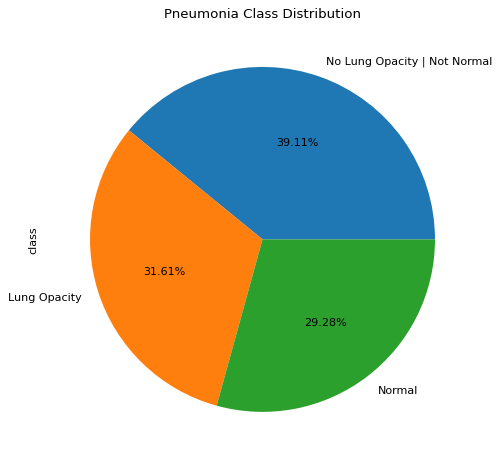

In [ ]:
edatools.plot_piechart("Pneumonia Class Distribution", pneumonia_data.df_merged_dicom, 
                       'class')

In [ ]:
pneumonia_data.df_merged_dicom_drop_duplicates['class'].value_counts()

No Lung Opacity | Not Normal    11821
Normal                           8851
Lung Opacity                     6012
Name: class, dtype: int64

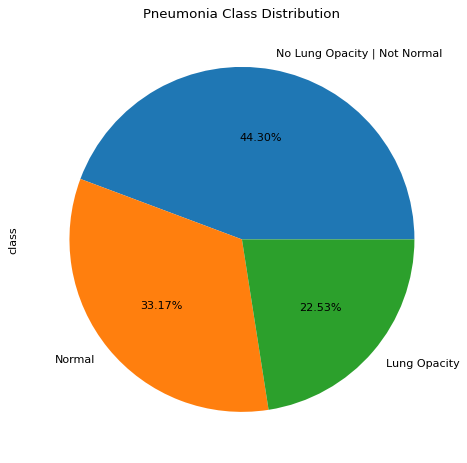

In [ ]:
edatools.plot_piechart("Pneumonia Class Distribution", pneumonia_data.df_merged_dicom_drop_duplicates, 
                       'class')

**Observations on class column:**

    When Target = 0 (No Pneumonia), the class is one of 'Normal' or 'No Lung Opacity/Not Normal'.
    When Target = 1(Pneumonia detected), the class is always that of 'Lung Opacity'
    
    Entire dataset:
        1. Entire dataset contains rows where 31.61% are having class 'Lung Opacity', 39.11% of them
           'No Lung Opacity/Not Normal' and as 29.28% as 'Normal'
      
        2. The 32.61% **does not** depict the propotion of people having Pneumonia as when Pneumonia is detected
           there could be multiple rows for a patient depiciting different x,y, width and height for bounding box.
           
        3. The 'Normal' case and ''No Lung Opacity/Not Normal' add up to cases when Target = 0 which means
           No Pneumonia
           
    Dataset where each row represents only one patient:
        1. 22.53% of the patients have Pneumonia in our dataset while 44.30% seem to have 
           'No Lung Opacity/Not Normal' and 33.17% of people have 'Normal' lungs
        2. Although the dataset is imbalanced , it's not as significant when we consider class as compared
           to Target
    

In [ ]:
n_lung_opacity = pneumonia_data.df_merged_dicom_drop_duplicates['class'].value_counts()['Lung Opacity']
n_normal       = pneumonia_data.df_merged_dicom_drop_duplicates['class'].value_counts()['Normal']
n_not_normal   = pneumonia_data.df_merged_dicom_drop_duplicates['class'].value_counts()['No Lung Opacity | Not Normal']

print_markdown(f'**Number of patients with Pneumonia or presence of Lung Opacity in the dataset = {n_lung_opacity}**')
print_markdown(f'**Number of patients with Normal Lungs in the dataset = {n_normal}**')
print_markdown(f'**Number of patients with No Lung Opacity | Not Normal Lungs in the dataset = {n_not_normal}**')

<span style='color:None'>**Number of patients with Pneumonia or presence of Lung Opacity in the dataset = 6012**</span>

<span style='color:None'>**Number of patients with Normal Lungs in the dataset = 8851**</span>

<span style='color:None'>**Number of patients with No Lung Opacity | Not Normal Lungs in the dataset = 11821**</span>

### EDA - Bounding Box Analysis

In [ ]:
def _get_bounding_box():
    df_pneumonia = pneumonia_data.df_merged_dicom[pneumonia_data.df_merged_dicom.Target==1]
    df_grouped = df_pneumonia.groupby('patientId').agg({'patientId': 'count'})
    df_grouped = df_grouped.rename(columns={'patientId': 'bounding_box_count'}).reset_index()
    
    return df_grouped


In [ ]:
df_bounding_box = _get_bounding_box()

In [ ]:
df_bounding_box.head()

patientId  bounding_box_count
0  000db696-cf54-4385-b10b-6b16fbb3f985                   2
1  000fe35a-2649-43d4-b027-e67796d412e0                   2
2  001031d9-f904-4a23-b3e5-2c088acd19c6                   2
3  001916b8-3d30-4935-a5d1-8eaddb1646cd                   1
4  0022073f-cec8-42ec-ab5f-bc2314649235                   2

In [ ]:
df_bounding_box.bounding_box_count.describe()

count    6012.000000
mean        1.589321
std         0.542800
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: bounding_box_count, dtype: float64

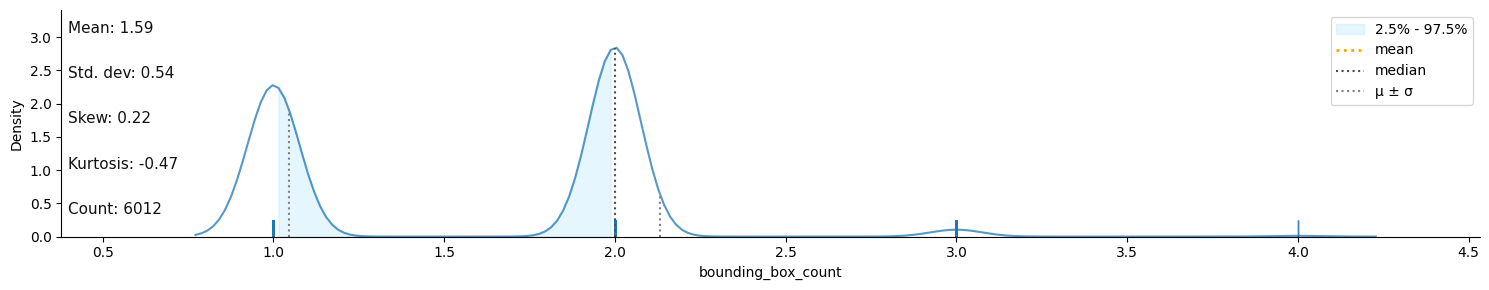

In [ ]:
edatools.plot_distribution_with_stats(df_bounding_box, 'bounding_box_count')

**Observations:**

    1. In our dataset where patients have Pneumonia , we have majority of the entries with either 2 or 1 bounding
       box of the affected area.
       
    2. There are only few entries with 3 or more such affected regions

In [ ]:
def _get_centroids():
    df_pneumonia = pneumonia_data.df_merged_dicom[pneumonia_data.df_merged_dicom.Target==1]
    df_pneumonia['centroid_x'] = df_pneumonia['x'] + df_pneumonia['width'] / 2
    df_pneumonia['centroid_y'] = df_pneumonia['y'] + df_pneumonia['height'] / 2
    
    return df_pneumonia[['patientId', 'sex', 'age', 'centroid_x', 'centroid_y']]
    
    return df_pneumonia
    

In [ ]:
df_centroids = _get_centroids()

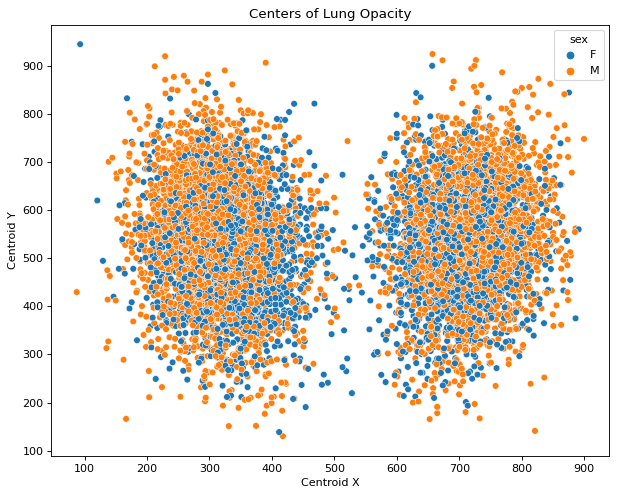

In [ ]:
edatools.plot_scatter("Centers of Lung Opacity", 
                      "Centroid X", "Centroid Y", df_centroids,
                      x_col='centroid_x', y_col='centroid_y',
                      hue_col='sex')

**Observations on Lung Opacity Bounding Boxes:**

    1. The centers of lung opacities seem to be fairly well distributed among both sides of the lungs.
    
    2. Within the lung sack; they seem to be fairly evenly distrubuted as well.
    
    3. Although there seems to be a concentration of the centroids around the middle and around,
       some x-ray images are tilted and not aligned within the exact frame. This can also result in some 
       stray entries

### EDA - Age & Gender Analysis

In [ ]:
def _get_df_pneumonia():
    df_pneumonia = pneumonia_data.df_merged_dicom_drop_duplicates\
    [pneumonia_data.df_merged_dicom_drop_duplicates.Target==1]
    
    return df_pneumonia[['patientId', 'sex', 'age', 'viewpos']]

def _get_df_pneumonia_by_gender(gender):
    return df_pneumonia[df_pneumonia['sex'] == gender]
    

In [ ]:
df_pneumonia = _get_df_pneumonia()

In [ ]:
df_pneumonia.head()

patientId sex  age viewpos
4   00436515-870c-4b36-a041-de91049b9ab4   F   32      AP
8   00704310-78a8-4b38-8475-49f4573b2dbb   M   75      PA
14  00aecb01-a116-45a2-956c-08d2fa55433f   F    6      AP
16  00c0b293-48e7-4e16-ac76-9269ba535a62   F   23      AP
19  00f08de1-517e-4652-a04f-d1dc9ee48593   M   58      AP

**Age Distribution in the entire dataset - with and without Pneumonia**

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


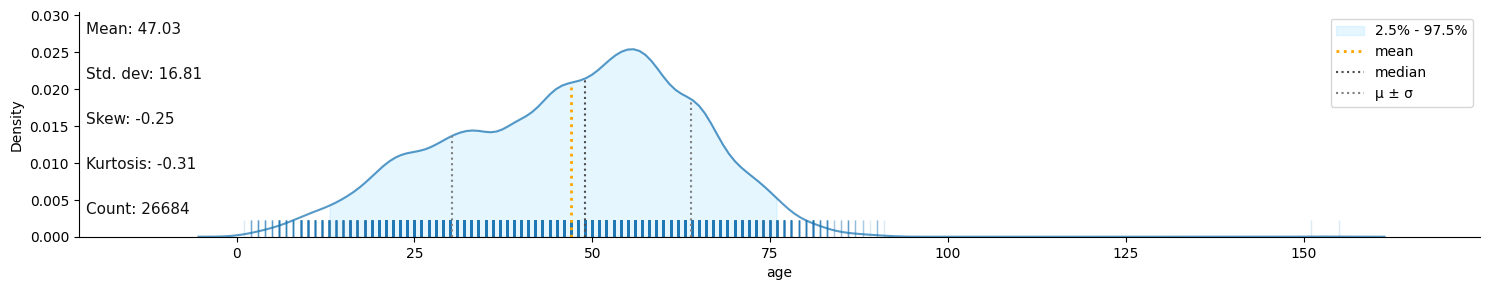

In [ ]:
edatools.plot_distribution_with_stats(pneumonia_data.df_merged_dicom_drop_duplicates, 'age')

**Age Distribution in patients with Pneumonia**

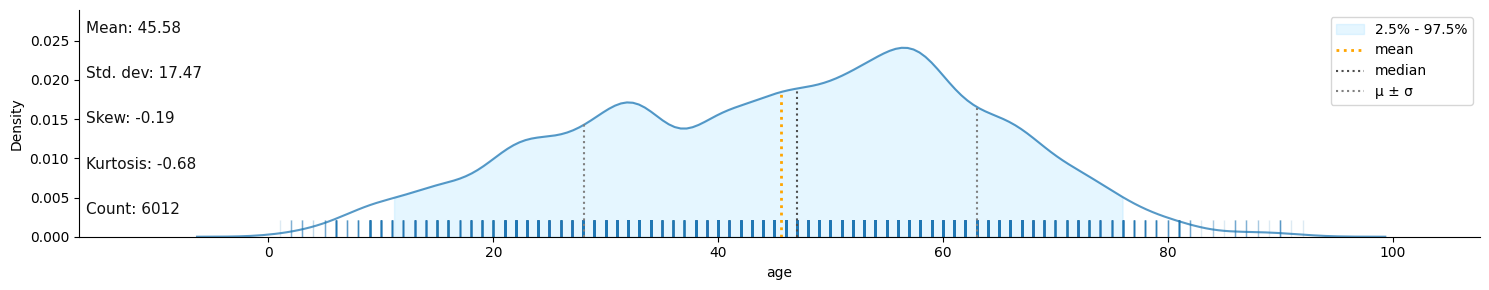

In [ ]:
edatools.plot_distribution_with_stats(df_pneumonia, 'age')

**Age Distribution in patients with Pneumonia - Female**

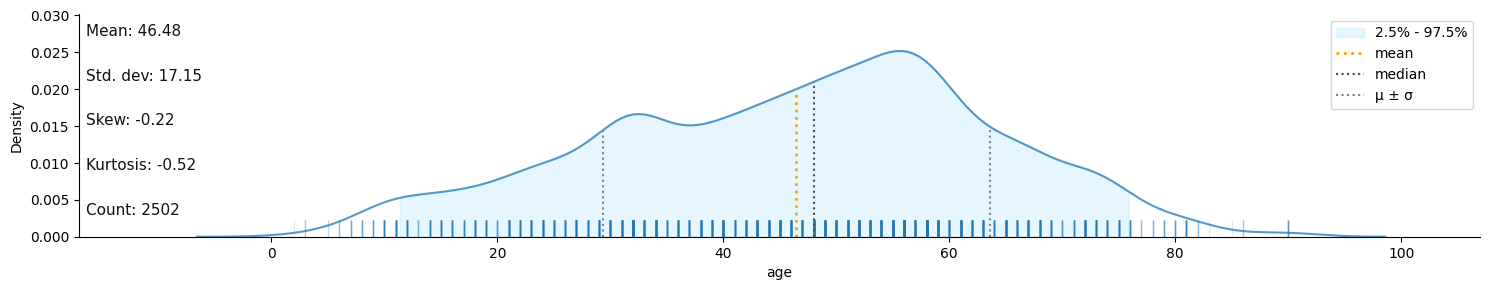

In [ ]:
edatools.plot_distribution_with_stats(_get_df_pneumonia_by_gender('F'), 'age')

**Age Distribution in patients with Pneumonia - Male**

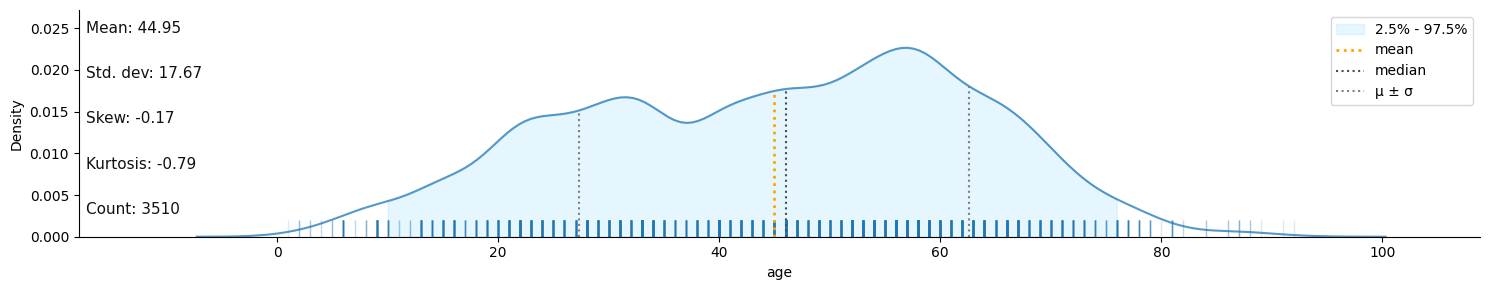

In [ ]:
edatools.plot_distribution_with_stats(_get_df_pneumonia_by_gender('M'), 'age')

**Hisogram of Pneumonia count based on age**

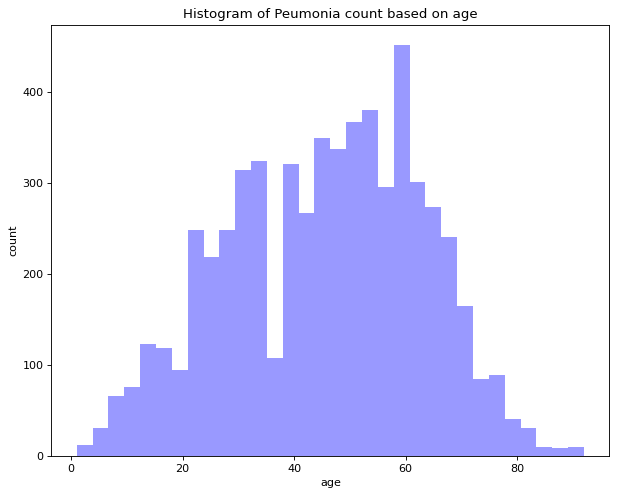

In [ ]:
edatools.plot_histogram(df_pneumonia, 'age', 
                        "Histogram of Peumonia count based on age", 
                        "age", "count")

**Age distribution in pateints with Pneumonia with added Gender Hue**

<Figure size 720x560 with 0 Axes>

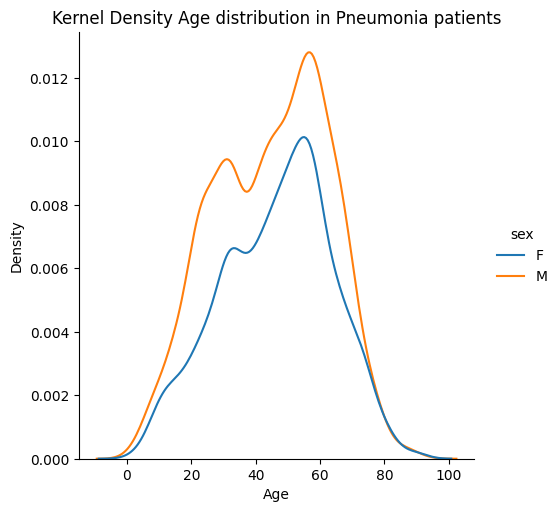

In [ ]:
edatools.plot_distribution(df_pneumonia, x_col='age', hue_col='sex',
                           title = "Kernel Density Age distribution in Pneumonia patients", 
                           x_label = "Age", 
                           y_label = "Density",
                           kind='kde')

**Number of Lung opacities and age**

In [ ]:
df_pneumonia_bb = datasetutils.merge_dataframes(df_pneumonia, df_bounding_box, 'patientId')

In [ ]:
df_pneumonia_bb.head()

patientId sex  age viewpos  bounding_box_count
0  00436515-870c-4b36-a041-de91049b9ab4   F   32      AP                   2
1  00704310-78a8-4b38-8475-49f4573b2dbb   M   75      PA                   2
2  00aecb01-a116-45a2-956c-08d2fa55433f   F    6      AP                   2
3  00c0b293-48e7-4e16-ac76-9269ba535a62   F   23      AP                   2
4  00f08de1-517e-4652-a04f-d1dc9ee48593   M   58      AP                   2

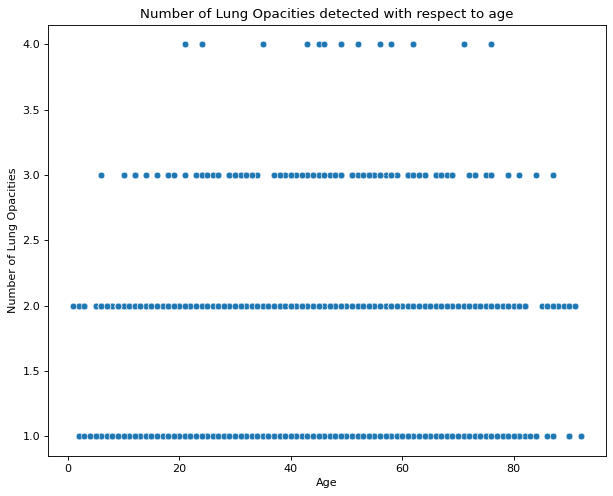

In [ ]:
edatools.plot_scatter("Number of Lung Opacities detected with respect to age", "Age", 
                      "Number of Lung Opacities",
                      df_pneumonia_bb, x_col='age', y_col='bounding_box_count', hue_col=None)

**Gender distribution of Pneumonia cases in the dataset**

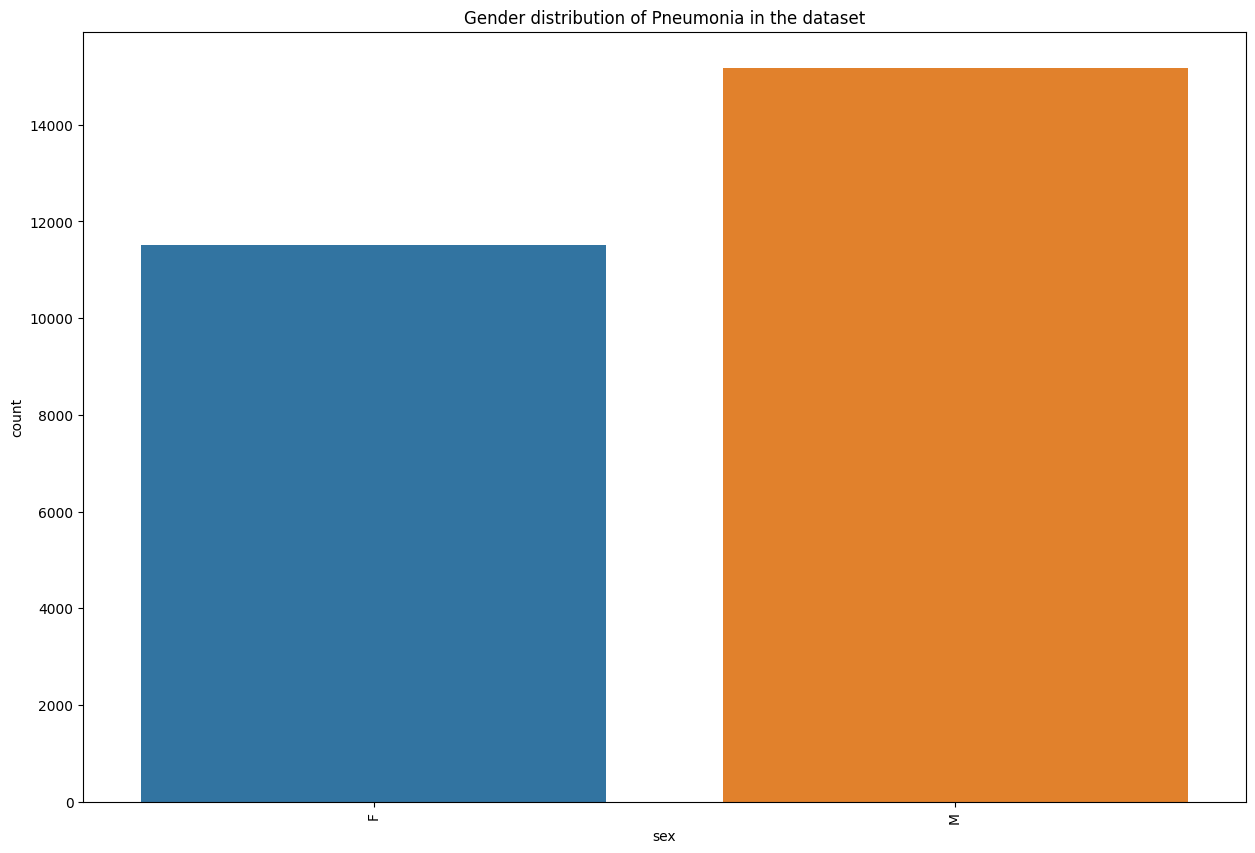

In [ ]:
edatools.plot_count("Gender distribution of Pneumonia in the dataset", 
                    pneumonia_data.df_merged_dicom_drop_duplicates, 
                    'sex', hue_col_name=None)

**Count plot of Target for different Genders**

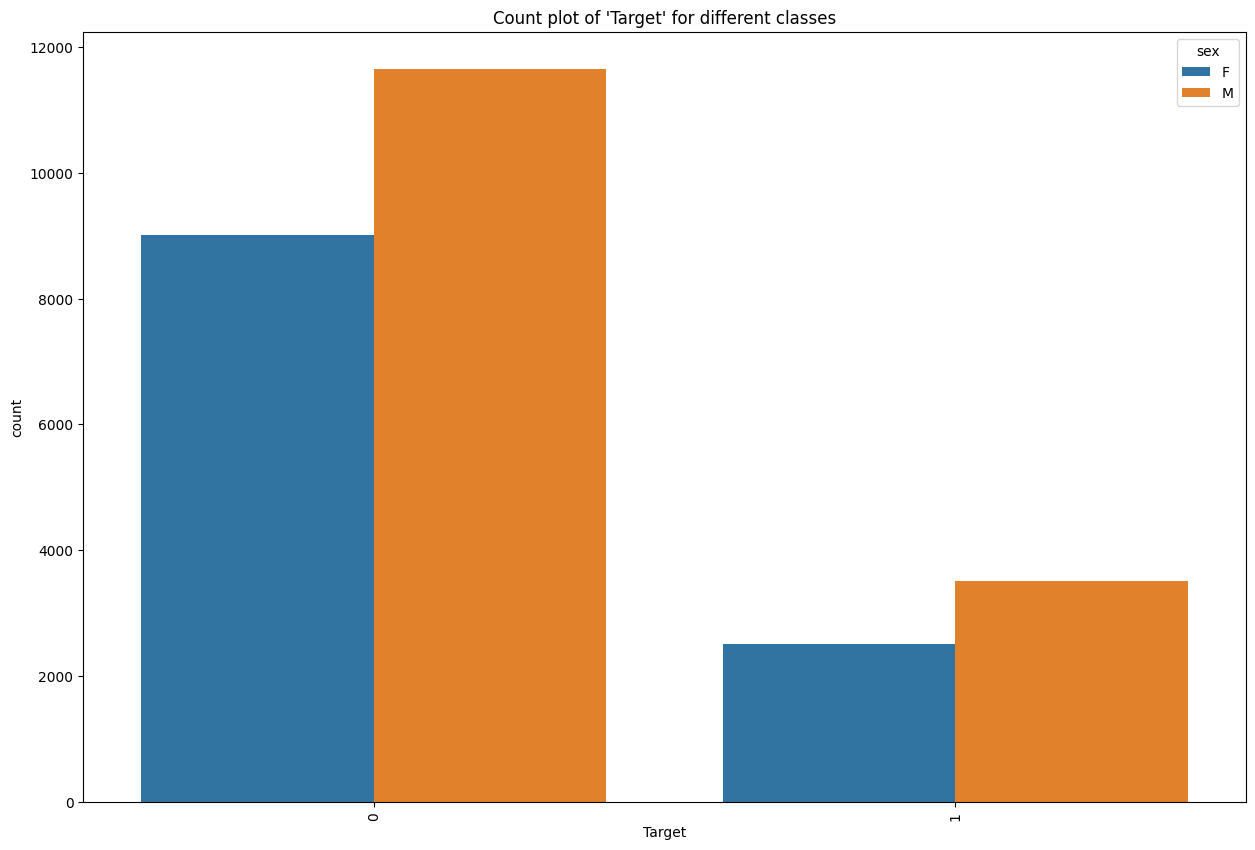

In [ ]:
edatools.plot_count("Count plot of 'Target' for different classes", 
                    pneumonia_data.df_merged_dicom_drop_duplicates, 
                    'Target', hue_col_name='sex')

**Count plot of Class for different Genders**

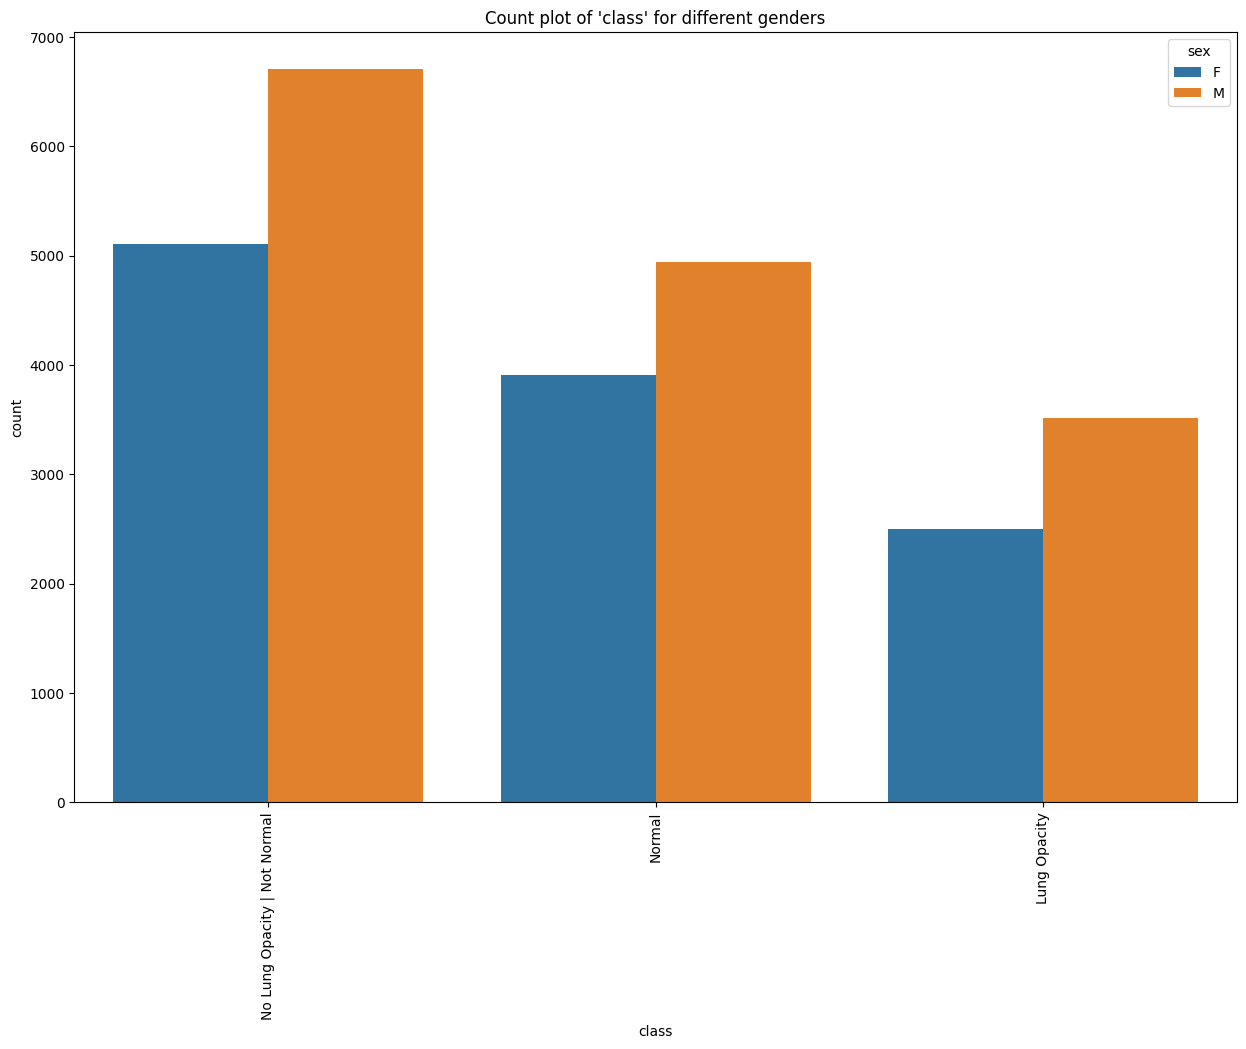

In [ ]:
edatools.plot_count("Count plot of 'class' for different genders", 
                    pneumonia_data.df_merged_dicom_drop_duplicates, 
                    'class', hue_col_name='sex')

**Observations on Age and Gender Analysis:**

    1. More Pneumonia cases seem to be present in people whose ages are between 40 and 65
    
    2. The above is true both for Males and Females although the mean age for Females 
       with Pneumonia is slightly lesser at 44 years
       
    3. We have lesser samples of Females compared to that of Males. This does not mean that
       males tend to develop Pneumonia more than Females. Its a reflection of the uneven record
       distribution in our dataset.
       
    5. The mean age of the patient when Pneumonia is detected is 45. The median is also round about this 
       value
       
    6. Lung Opacities count of 1 and 2 are higher in our dataset and they are sort of spread evenly across
       age range. Majority of opacity count of 4 seem to be in the range of 40 to 60
       
    7. The Target and Class distributions for Males have higher numbers than Females , but in propotion to
       the number of samples between Males and Females.
    
    

### EDA - View Positions

**View position distribution on the entire dataset**

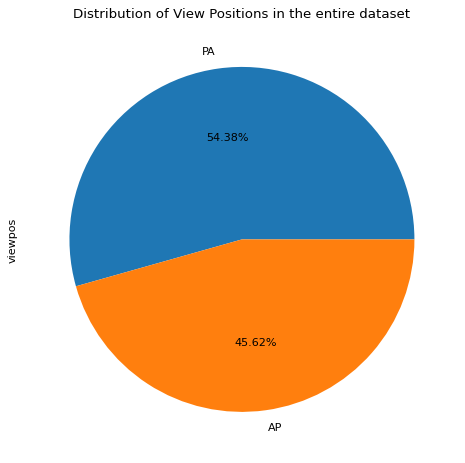

In [ ]:
edatools.plot_piechart("Distribution of View Positions in the entire dataset", 
                       pneumonia_data.df_merged_dicom_drop_duplicates, 
                       'viewpos', labels=None)

**View position distribution in Pneumonia patients**

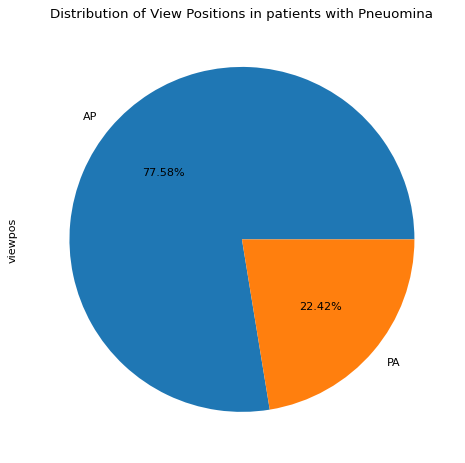

In [ ]:
edatools.plot_piechart("Distribution of View Positions in patients with Pneuomina",
                       df_pneumonia, 
                       'viewpos', labels=None)

**Observations on ViewPosition Analysis**

    1. PA and AP are "Posterior-Anterior" and "Antero-Posterior" respectively.
    2. In the entire dataset, there are 54% which are taken with PA view and 46% AP view
    3. In the patients with Pneumonia , the PA view is only 22% while AP is 78%
    4. The AP view is good in detecting pleural effusion which appears as increased opacity in CXR
    5. The PA view is good in detecting Pneumonia in lungs as the image has a clear picture of the lungs
    

### EDA Summary

    1. 32% of the samples are Pneumonia cases while 68% are non Pneumonia. 
    2. Of these 32%, there are multiple entries for a patient in some cases as there are multiple
       locations of lung opacity detected.
    3. Number of unique patients are 26684. In this 23% are Pneumonia cases while 77% are not.
    4. Every row has a 'class' impression which is one of 'Lung Opacity', 'Normal' and 'Not Normal'.
       'Lung Opacity' refers to Target 1 which is Pneumonia present while 'Normal' and 'No Lung Opacity / Not 
       Normal' add up to Target 0 which is non presence of Pneumonia.
    5. 23% of patients have impression 'Lung Opacity' while 33% have 'Normal' and rest 44% have 
       'No Pneumonia / Not Normal' impression
    6. We have more samples of Males in the data compared to Females
    7. In our dataset, age group between 40-60 tend to have higher count of the Pneumonia cases.
    8. While most Pneumonia patients have 1 or 2 bounding box (Lung Opacity) detected, there are patients
       that have 3 or 4 such areas as well.
    8. The bounding boxes seem to be evenly distributed on either lungs and within the resgion of the lungs.
    9. Both male and females with Pneumonia exhibit similar characteristics in terms of age distribution and 
       case count.
    10. There does not seem to be any specific correlation between number of lung opacity and age. It seems
        evenly distributed.
    11. As the number of data samples of Males and slightly higer, correspondingly the Target and class
        distribution for Males and Females follow this difference although slight.
    12. The Chest X-rays (CXR) are taken from 2 different positions "Posterior-Anterior" (PA)
        and "Antero-Posterior"(AP). In the entire dataset 54% are AP views while 46% are PA views.
        When Pneumonia is detected, 22% are PA views while 78% are AP views.
       

## 4.) Preprocessing and Visualisation of different classes

### Pre-process images
Images are pre-processed using a helper method defined in PneumoniaData class. This method does the following **for each image in the dataset:**

    1. Loads the dicom image from path using dicom utility
    2. Converts the image to array suitable for opencv library to consume
    3. Sharpening filter
    4. Re-size to 128x128
    5. Convert each image to 3D array
    

In [ ]:
resize_image_width  = 256
resize_image_height = 256

#pre-process a single image given the path
def pre_process_image(image_path):
    #read and get pixel data from dicom image
    dicom_data = dicom.read_file(image_path)
    dicom_image = dicom_data.pixel_array
    #convert to np.array
    img = np.array(dicom_image).astype(np.uint8)
    #sharpen filter kernel and conversion
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img_sharp = cv2.filter2D(img, -1, kernel)
    #image re-size
    img_res = cv2.resize(img_sharp, (resize_image_width, resize_image_height),
                         interpolation = cv2.INTER_AREA)
    
    #convert 2D array to 3D array
    img_res = np.expand_dims(img_res, axis=-1)

    return img_res

def pre_process_and_save_image(image_path):
    image_array = pre_process_image(image_path)
    processed_image_path = os.path.splitext(image_path)[0]
    processed_image_path = processed_image_path + ".jpg"
    if cv2.imwrite(processed_image_path, image_array) == False:
        print(f"Failed to write {processed_image_path}\n")

def get_pre_processed_path(image_path):
    processed_image_path = os.path.splitext(image_path)[0]
    processed_image_path = processed_image_path + ".jpg"
    return processed_image_path

#pre process all images and store vector in dictionary
def populate_pre_proessed_image_paths():
    pneumonia_data.df_merged_dicom_drop_duplicates['image_path_processed'] = pneumonia_data.df_merged_dicom_drop_duplicates.parallel_apply(lambda row: get_pre_processed_path(row['image_path']), axis=1)
    

def process_images():
    image_paths = pneumonia_data.df_merged_dicom_drop_duplicates['image_path'].tolist()
    with tqdm(total = len(image_paths), desc="Image pre-processing") as pbar:
        def update_pbar(*args, **kwargs):
            pbar.update(1)
            
    Parallel(n_jobs=-1)(delayed(pre_process_and_save_image)(image_path) for i, image_path in enumerate(image_paths))
            

**We will now call the above function on each image in the dataset and process the same. The resulting
  data will be stored in the dataframe itself as a new caloumn called 'image_array'**

In [ ]:
populate_pre_proessed_image_paths()

In [ ]:
#process_images()

In [ ]:
pneumonia_data.df_merged_dicom_drop_duplicates[pneumonia_data.df_merged_dicom_drop_duplicates['Target']==1].iloc[0]['image_path_processed']

'./data/stage_2_train_images/Lung Opacity/00436515-870c-4b36-a041-de91049b9ab4.jpg'

In [ ]:
pneumonia_data.df_merged_dicom_drop_duplicates[pneumonia_data.df_merged_dicom_drop_duplicates['Target']==1].iloc[0]['image_path']

'./data/stage_2_train_images/Lung Opacity/00436515-870c-4b36-a041-de91049b9ab4.dcm'

In [ ]:
pneumonia_data.df_merged_dicom_drop_duplicates.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity | Not Normal   
1  No Lung Opacity | Not Normal   
2  No Lung Opacity | Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path sex  age  \
0  ./data/stage_2_train_images/No Lung Opacity | ...   F   51   
1  ./data/stage_2_train_images/No Lung Opacity | ...   F   48   
2  ./data/stage_2_train_images/No Lung Opacity | ...   M   19   
3  ./data/stage_2_train_images/Normal/003d8fa0-6b...   M   28   
4  ./data/stage_2_train_images/Lung Opacity/00436...   F   32   

  bodypartexamined viewpos modality  \
0            CHEST      PA       CR   
1            CHEST      PA       CR   
2            CHEST      AP       CR   
3            CHEST      PA       CR   
4            CHEST      AP       CR   

                                image_path_processed  
0  ./data/stage_2_train_images/No Lung Opacity | ...  
1  ./data/stage_2_train_images/No Lung Opacity | ...  
2  ./data/stage_2_train_images/No Lung Opacity | ...  
3  ./data/stage_2_train_images/Normal/003d8fa0-6b...  
4  ./data/stage_2_train_images/Lung Opacity/00436...

In [ ]:
class ImageUtils:
    def display_dicom_samples(self, tile_header, samples, images_per_row=3, bounding_box=False):
        print_markdown(f'<h2 style="font-size:20px;">{tile_header}</h2>')
        i = 0
        count = len(samples)
        n_rows = count // images_per_row
        
        #set squeeze option to make the axes always 2D
        fig, axes = plt.subplots(n_rows, images_per_row, squeeze=False, figsize = (20, 20))
        
        for patientId, sample in samples.items():
            dicom_image = dicom.dcmread(sample['image_path'])
            
            ax = axes[i//images_per_row, i % images_per_row]
            ax.imshow(dicom_image.pixel_array, cmap = plt.cm.bone)
            ax.set_title(f"class = {sample['impression']}, Age = {sample['age']}, Gender = {sample['gender']}, ViewPos = {sample['viewpos']}")
            ax.axis('off')
            
            if bounding_box:
                try:
                    bounding_boxes = sample['bounding_box']
                    for bounding_box in bounding_boxes:
                        rect = Rectangle(xy = (bounding_box['x'], bounding_box['y']), 
                                                 width = bounding_box['width'], 
                                                 height = bounding_box['height'], 
                                                 fill=False, color='red')
                        ax.add_patch(rect)
                except KeyError as error:
                    pass

            i+=1
            
        plt.show()
        print_markdown("<hr>")
        
image_utils = ImageUtils()

In [ ]:
#The PneumoniaData class has a helper method called get_random_samples that returns random samples
#of images based on viewpos and impression. It also gets all the bounding boxes for samples where 
#Pneumonia is detected. Note for a given patientId in some cases where Pneumonia was detected, there
#are multiple rows. These are depecting different bounding boxes for the same.
def _display_sample_images(viewpos):
    impressions = pneumonia_data.df_merged_dicom['class'].unique()
    for impression in impressions:
        impression_samples = pneumonia_data.get_random_samples(view_pos=viewpos, impression=impression, count=4)
        image_utils.display_dicom_samples(f"Sample images where impression is {impression}", 
                                  impression_samples, images_per_row=2)    

### Samples images of different classes - PA (posteroa|nterior) View

We have three classes (Normal, No Lung Opacity / Not Normal, Lung Opacity)

In [ ]:
_display_sample_images("PA")

### Samples images of different classes - AP (anteroposterior) View

We have three classes (Normal, No Lung Opacity / Not Normal, Lung Opacity)

In [ ]:
_display_sample_images("AP")

## 5.) Display images with bounding box.

In [ ]:
def _display_sample_images_with_bounding_box(viewpos):
    impression = 'Lung Opacity'
    
    impression_samples = pneumonia_data.get_random_samples(view_pos=viewpos, 
                                                           impression = impression, count=6)
    
    image_utils.display_dicom_samples(f"Sample images where impression is {impression}", 
                                  impression_samples, images_per_row=2, bounding_box=True)
        

### Samples images with bounding box - Posterior-Anterior (PA) view

<span style='color:None'><h2 style="font-size:20px;">Sample images where impression is Lung Opacity</h2></span>

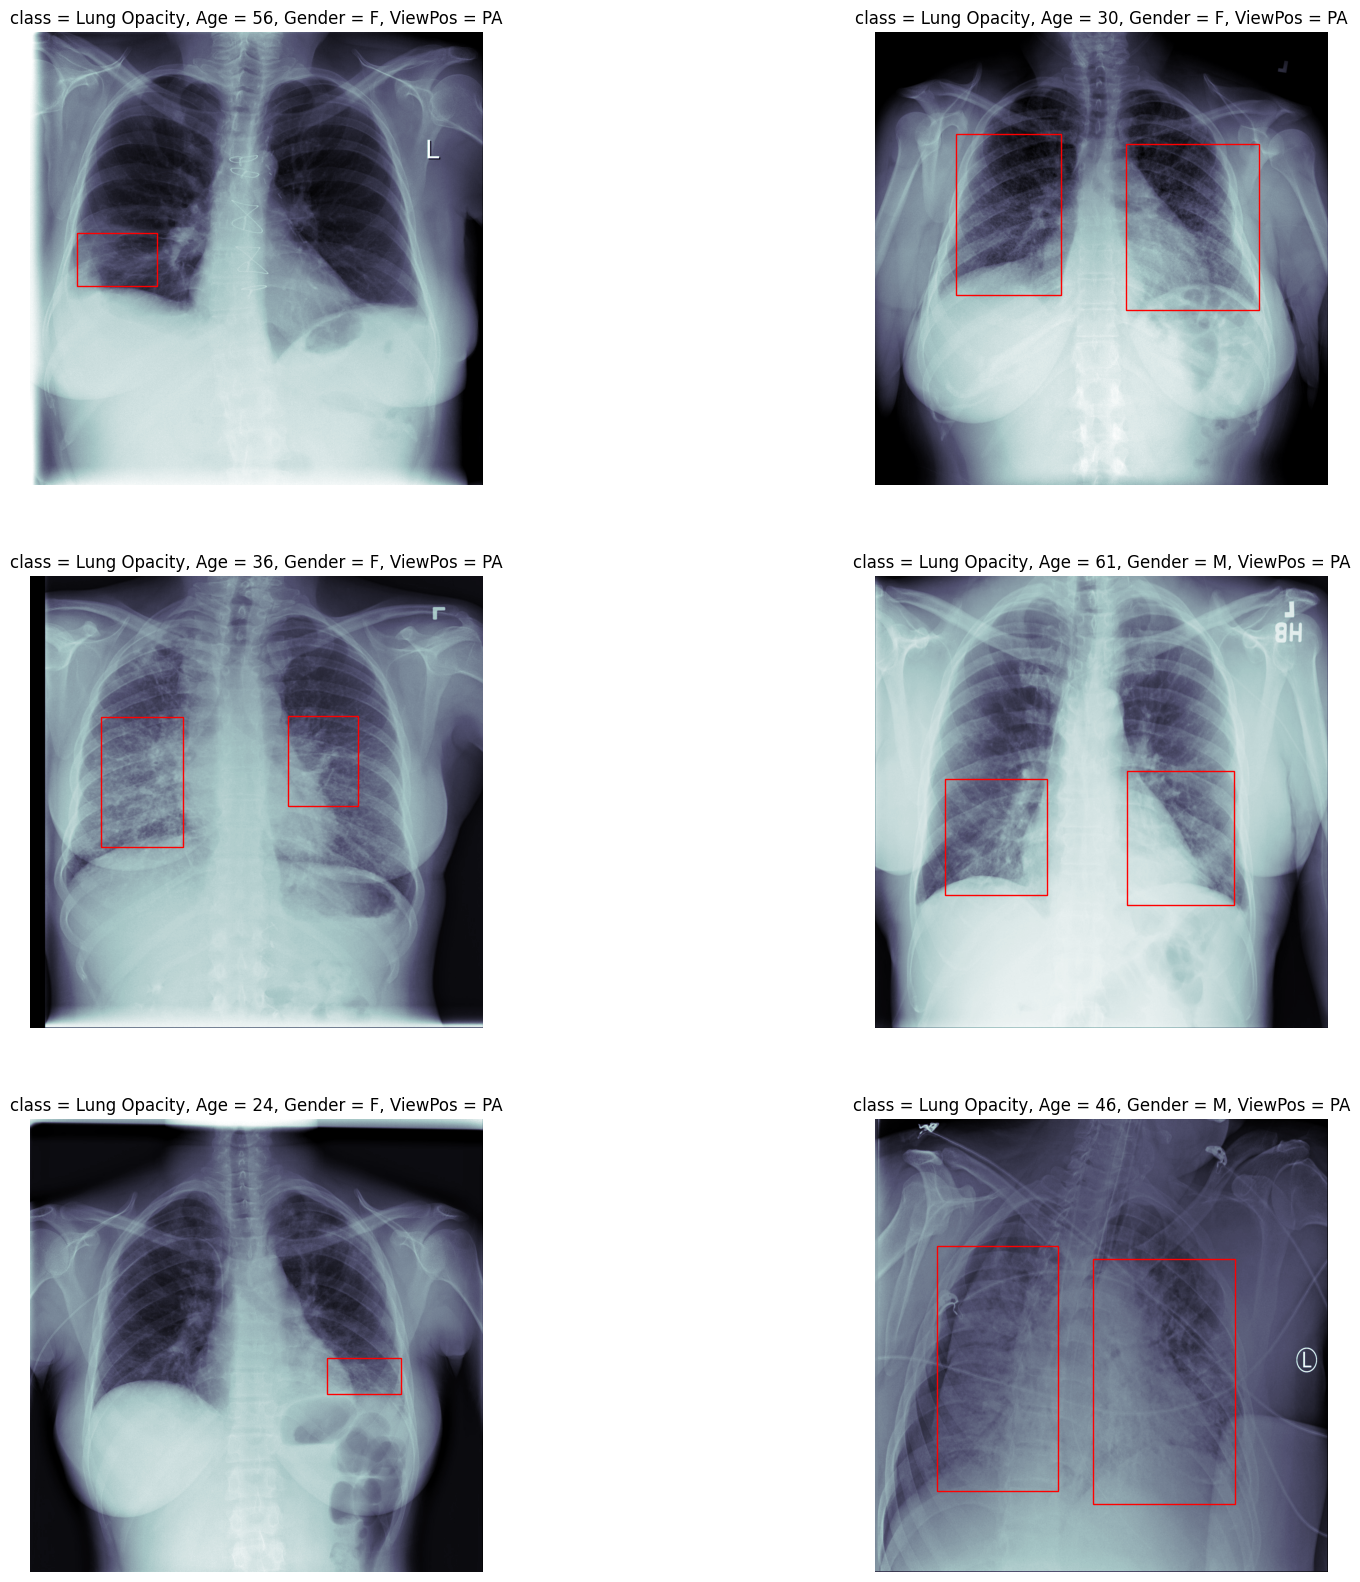

<span style='color:None'><hr></span>

In [ ]:
_display_sample_images_with_bounding_box("PA")

### Samples images with bounding box - Antero-Posterior (AP) view

<span style='color:None'><h2 style="font-size:20px;">Sample images where impression is Lung Opacity</h2></span>

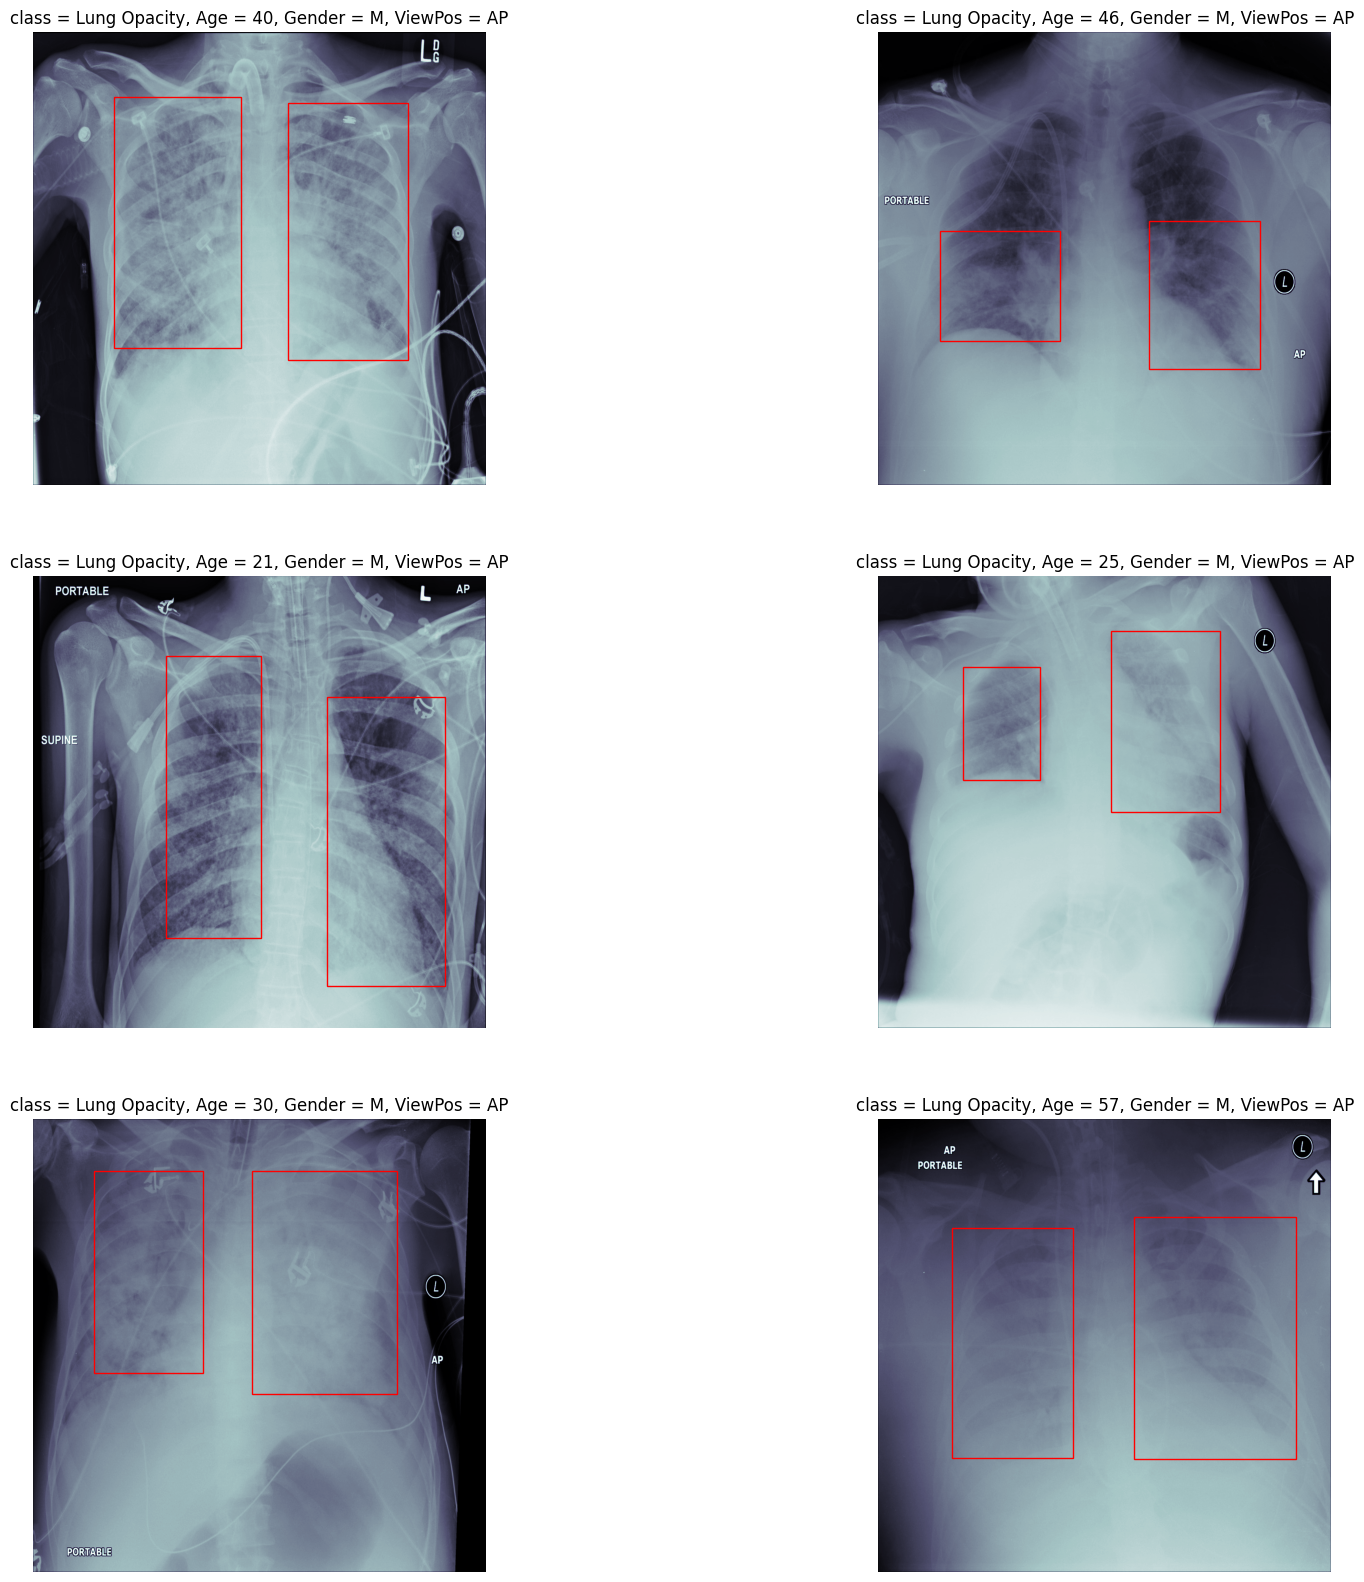

<span style='color:None'><hr></span>

In [ ]:
_display_sample_images_with_bounding_box("AP")

### Some sample images where number of Lung Opacities  are more (4)

In [ ]:
def _display_samples_with_bb_count(bb_count):
    sample_ids = df_bounding_box[df_bounding_box.bounding_box_count == bb_count].sample(4)['patientId'].tolist()
    samples = pneumonia_data.df_merged_dicom_drop_duplicates[pneumonia_data.df_merged_dicom_drop_duplicates['patientId'].isin(sample_ids)]
    impression_samples = pneumonia_data.get_data_for_samples(samples)
    
    image_utils.display_dicom_samples(f"Images where number of detected Lung Opacities are more", 
                                  impression_samples, images_per_row=2, bounding_box=True)

<span style='color:None'><h2 style="font-size:20px;">Images where number of detected Lung Opacities are more</h2></span>

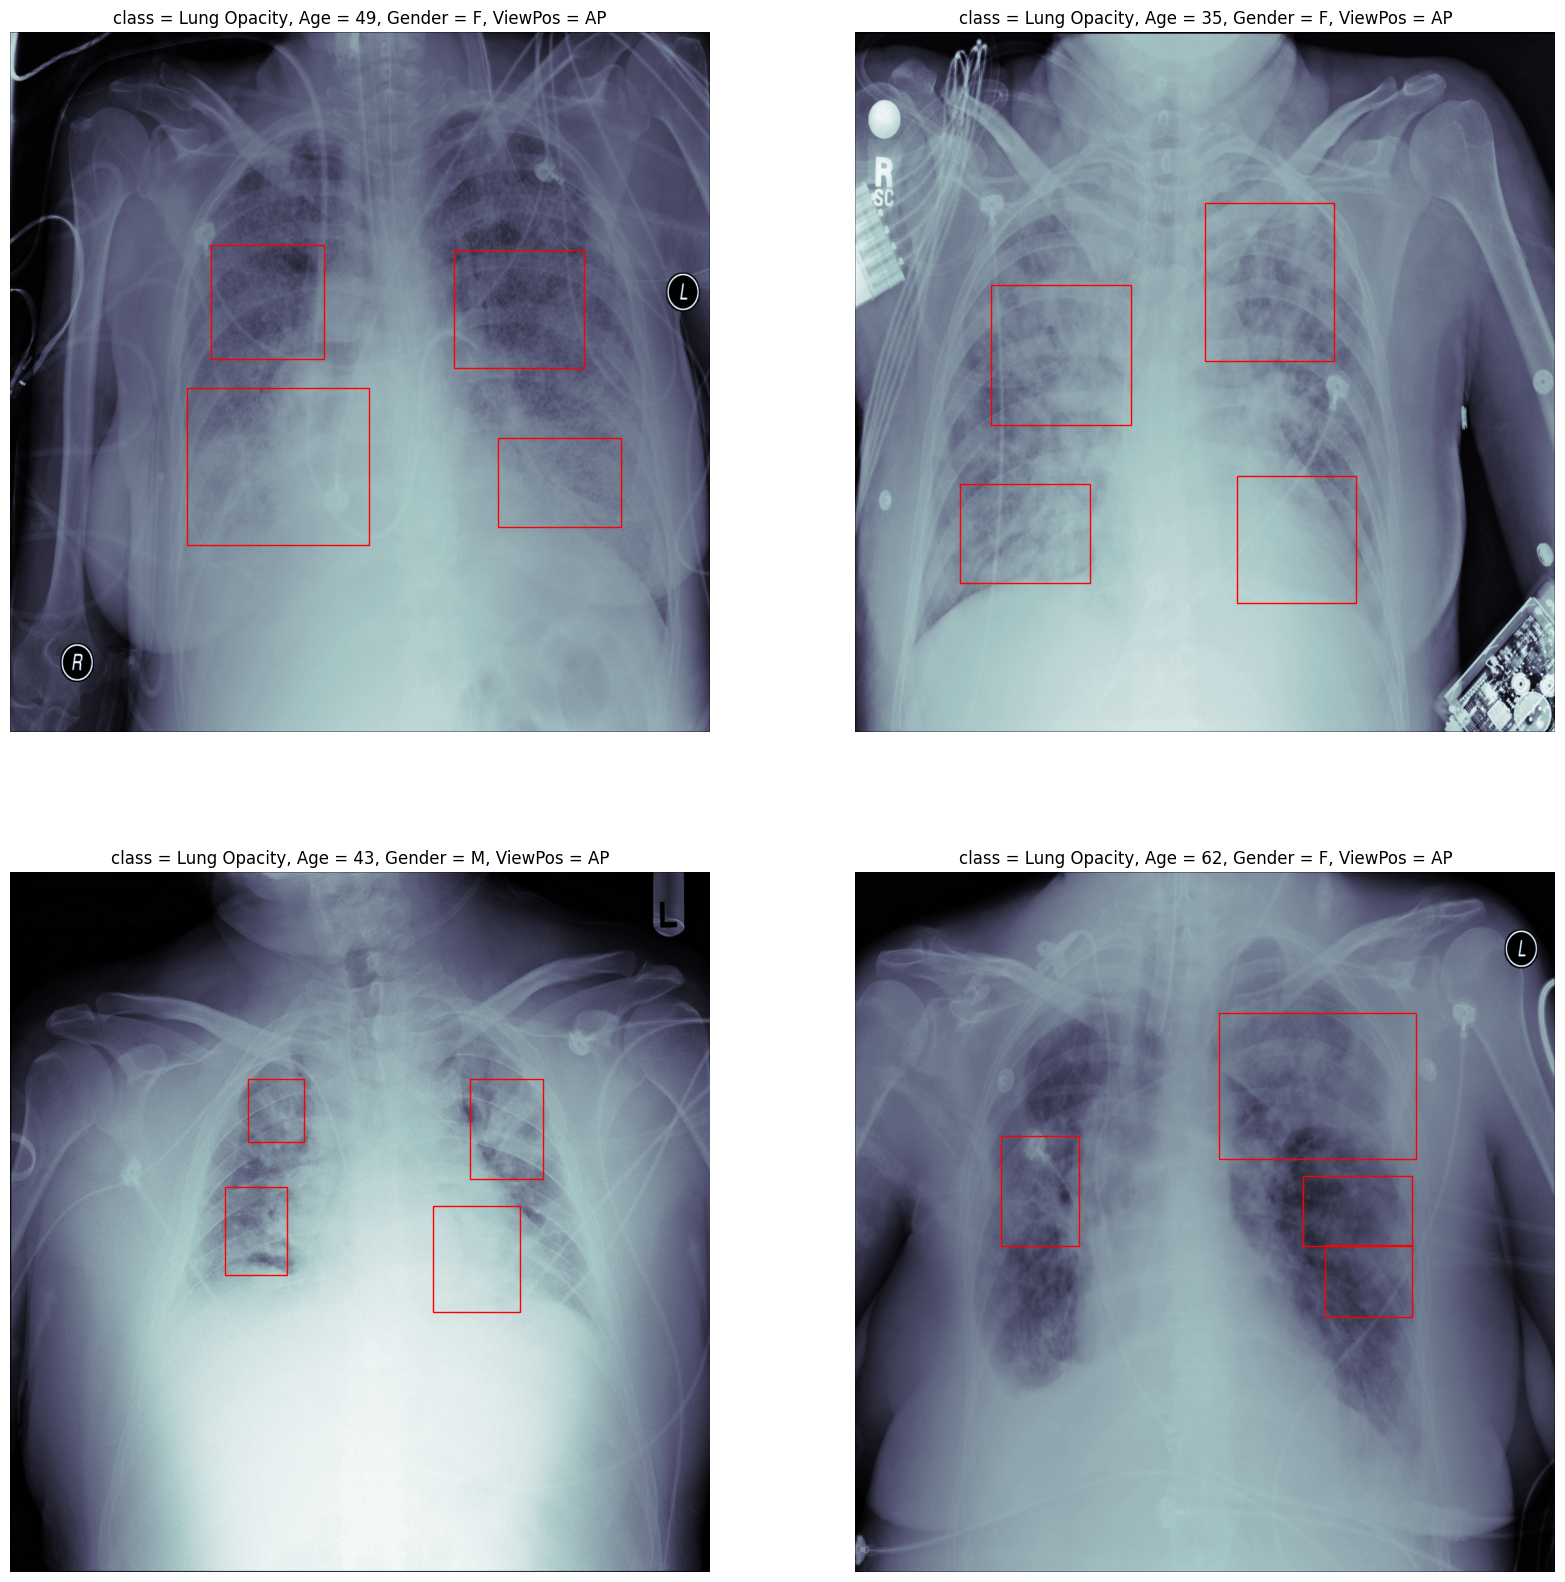

<span style='color:None'><hr></span>

In [ ]:
_display_samples_with_bb_count(4)

## 6.) Design, train and test basic CNN models for classification.

### Data Preparation
We have a dataset that contains about 22% of patients have Pneumonia, 33% Normal and 44% No Lung Opacity / Not Normal. We will do the following two strategies broadly:

* **Class Ratio 2:1:1**

    1. Balance the data to have equal propotions of Target 1 and Target 0. 
    2. The 'Normal' and 'Not Normal' cases are Target 0. We will internaly have this
       in the ratio 1:1 within Target 0 class.
    3. With the above ground rules, our ratio of Lung Opacity : Normal : Not Normal will be 2:1:1
    4. Balancing strategy for this Phase would involve undersampling the majority class.
    5. Our Train : Val : Test ration would be 60:20:20
    
    
* **Target Ratio 1:1**

    1. Balance the data to have equal propotions of Target 1 and Target 0. 
    2. The 'Normal' and 'Not Normal' cases are Target 0. We will internaly have this
       in the ratio randomly picked
    3. With the above ground rules, our ratio of Lung Opacity : (Normal + Not Normal) will be 1:1
    4. Balancing strategy for this Phase would involve undersampling the majority class.
    5. Our Train : Val : Test ration would be 60:20:20
       
    




In [ ]:
#normalize pixel values of images to a range between (0,1)
def normalize_image(X):
    X_norm = X / 255.0
    return X_norm

#First encode the labels and then convert them to categorical
def encode_cat(y):
    le = LabelEncoder()
    encodedY = le.fit_transform(y)
    y_cat = to_categorical(encodedY)
    return le, y_cat

#encode the labels
def encode_label(y):
    le = LabelEncoder()
    encodedY = le.fit_transform(y)
    return le, encodedY

#get train and test data
def get_train_test(X, y, test_size=0.2):
    return train_test_split(X, y, stratify = y, test_size = test_size)

#display value counts for an array
def display_nparray_value_counts(name, arr):
    print(f'{name} unique values = {np.unique(arr, return_counts=True)}\n')
    

def get_image_labels(X_train, y_train, X_val, y_val, X_test, y_test):
    #convert to arrays
    X_train = X_train[['image_path_processed']].to_numpy().squeeze()
    y_train = y_train.to_numpy().squeeze()
    
    X_val = X_val[['image_path_processed']].to_numpy().squeeze()
    y_val = y_val.to_numpy().squeeze()
    
    X_test = X_test[['image_path_processed']].to_numpy().squeeze()
    y_test = y_test.to_numpy().squeeze()
    
    return X_train, y_train, X_val, y_val, X_test, y_test

#display shapes of train, val and test data
def display_shapes(X_train, y_train, X_val, y_val, X_test, y_test):
    print(f'X_train shape = {X_train.shape}\n')
    print(f'y_train shape = {y_train.shape}\n')
    print(f'X_val shape   = {X_val.shape}\n')
    print(f'y_val shape   = {y_val.shape}\n')
    print(f'X_test shape  = {X_test.shape}\n')
    print(f'y_test shape  = {y_test.shape}\n')

### Base class for Image classification

    Base class for a classifier that encapsulates creating model, training , validation and testing. It also
    contains helper methods to plot the performance of the training and later display classification report,
    confusion matrix etc
    
    Every classifier we further develop and experiment , we will inherit from this class

In [ ]:
#Base class image classifier
class ImageClassifier:
    def __init__(self, name, train_ds, val_ds):
        self.model_weights_name = 'model_weights.h5'
        
        self.checkpoint = ModelCheckpoint('model_weights.h5', monitor='val_loss', 
                                          verbose=1, save_best_only=True, mode='min')

        self.reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1,
                                           patience = 2, min_lr = 0.00001, model='auto')
        
        self.early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
    
        #default epocs
        self.num_epochs = 3
        #default batch size
        self.batch_size = 32
        
        #name
        self.name = name
        #training data
        self.train_ds = train_ds
        #val data
        self.val_ds = val_ds
        
        #the model
        self.model = None
        #training history
        self.training_history = None
        #metrics
        self.metrics = dict()
    
        #input shape
        self.input_shape = next(iter(self.train_ds))[0][0].shape
        
        
    #We will let the derived class implement it
    def create_model(self):
        pass
                 
    #train model
    def train(self):
        self.monitoring_callacks = [self.checkpoint, self.reduce_lr, self.early_stopping]
        #Fit Model
        self.training_history = self.model.fit(self.train_ds, 
                                               validation_data=self.val_ds,
                                               epochs=self.num_epochs, 
                                               callbacks=self.monitoring_callacks,
                                               verbose=1)
        
        return self.training_history
    
    #plot the model
    def plot_model(self):
        return plot_model(self.model, show_shapes=True, 
                   show_layer_names=True, 
                   rankdir='TB', expand_nested=True)
    
    #visualize the model
    def visualize_model(self):
        return visualkeras.layered_view(self.model,legend=True)

    #plot train / val loss against epocs
    def plot_loss_against_epoc(self):
        figure(figsize=(9, 7), dpi=80)
        plt.plot(self.training_history.history['loss'])
        plt.plot(self.training_history.history['val_loss'])
        plt.title(f'Training loss curve for {self.name}\n')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['training', 'validation'], loc='best')
        plt.show()
    
    #plot train / val accuracy against epochs
    def plot_accuracy_against_epoc(self):
        figure(figsize=(9, 7), dpi=80)
        plt.plot(self.training_history.history['accuracy'])
        plt.plot(self.training_history.history['val_accuracy'])
        plt.title(f'Training accuracy curve for {self.name}\n')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['training', 'validation'], loc='best')
        plt.show()
    
    #predict data
    def predict(self, test_ds):
        return np.squeeze(self.model.predict(test_ds))

    #load saved model after training
    def load_saved_model(self):
        self.model = load_model(self.model_weights_name)
        
    #get various metrics like precision, recall, f1, accuracy, rocauc etc        
    def evaluate_metrics(self, test_ds, probability_threshold=0.5, average='binary'):
        metrics = dict()
        y_test = []
        for i, (_, labels) in enumerate(test_ds):
            y_test.append(labels.numpy())            
        y_test = np.concatenate(y_test)
        
        #Predict 
        y_test_probs = self.predict(test_ds)
        y_test_pred = (y_test_probs >= probability_threshold).astype(int)
    
        fpr, tpr, thresholds = roc_curve(y_test, y_test_probs, pos_label=1)
        rocauc = auc(fpr, tpr)

        #Get various metrics
        testing_accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average=average)
        recall = recall_score(y_test, y_test_pred, average=average)
        f1 = f1_score(y_test, y_test_pred, average=average)
        
        #weighted averages
        wt_precision = precision_score(y_test, y_test_pred, average='weighted')
        wt_recall = recall_score(y_test, y_test_pred, average='weighted')
        wt_f1 = f1_score(y_test, y_test_pred, average='weighted')

        #Populate results in a dictionary
        metrics['actual'] = y_test
        metrics['preds'] = y_test_pred
        metrics['probs'] = y_test_probs
        metrics['testing_accuracy'] = testing_accuracy
        metrics['precision'] = precision
        metrics['wt_precision'] = wt_precision
        metrics['recall'] = recall
        metrics['wt_recall'] = wt_recall
        metrics['f1'] = f1
        metrics['wt_f1'] = wt_f1
        metrics['roc_auc'] = rocauc
        
        return metrics
    
    #set metrics
    def set_metrics(self, metrics):
        self.metrics = metrics

    #display the metrics
    def print_model_metrics(self):
        print(f'Metrics for {self.name}:\n')
        print(f'Testing Accuracy = {self.metrics["testing_accuracy"]}\n')
        print(f'Precision score = {self.metrics["precision"]}\n')
        print(f'Recall score = {self.metrics["recall"]}\n')
        print(f'F1 score = {self.metrics["f1"]}\n')
        print(f'ROC AUC = {self.metrics["roc_auc"]}\n')
    
    #plot roc curve
    def plot_roc_curve(self):
        fpr, tpr, thresholds = roc_curve(self.metrics['actual'], 
                                         self.metrics['probs'], pos_label=1)
        rocauc = auc(fpr, tpr)
        plt.clf()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % rocauc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {self.name}\n')
        plt.legend(loc="lower right")
        plt.show()
        
    
    #plot confusion matrix
    def plot_confusion_matrix(self):
        cm = confusion_matrix(self.metrics['actual'], self.metrics['preds'])
        plt.figure(figsize=(10,7))
        sns.heatmap(cm,annot=True,fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
    #display all metrics after training is complete
    def display_metrics(self, roc=True):
        self.plot_loss_against_epoc()
        self.plot_accuracy_against_epoc()
        self.print_model_metrics()
        print(classification_report(self.metrics['actual'], self.metrics['preds']))
        self.plot_confusion_matrix()
        if roc is True:
            self.plot_roc_curve()

### Base CNN Model - 3 Convolution Layers

Highlights the base CNN Model

    1. 3 Convolution layers 32, 64, and 128 respectively. Each stage has filter dimension of 3x3 and
       padding set to 'same'
    2. MaxPooling2D with pool_size = (2,2) and BatchNormalization, Dropout after every Convolution layer.
    3. 2 Hidden layers following the Convolution layers with 128 and 64 Neurons respectively. Each hidden
       layer is followed by BatchNormalization and Dropout
    4. Relu activation for the Convolve and Hidden layers 
    5. Adaptive learning rate using callbacks
    6. Finally sigmoid with binary_crossentropy
    7. Using Adam optimizer with a initial LR 1e-3

In [ ]:
#CNNImageClassifier derives from ImageClassifier
class CNNImageClassifier3CL(ImageClassifier):
    def __init__(self, name, weight_file_name, train_ds, val_ds):
        super().__init__(name, train_ds, val_ds)
        
        self.model_weights_name = weight_file_name
        self.num_epochs = 11
        self.batch_size = 32
        
        self.checkpoint = ModelCheckpoint(self.model_weights_name, monitor='val_loss', 
                                          verbose=1, save_best_only=True, mode='min')
    
    def create_model(self):
        cnn = Sequential()
        #input and first convolution layer
        cnn.add(Conv2D(32, (3, 3), activation="relu", padding='same', 
                       input_shape=self.input_shape))
        cnn.add(MaxPooling2D(pool_size = (2, 2)))
        cnn.add(BatchNormalization())
        #cnn.add(Dropout(0.4))
        
        #convolution layer - 2
        cnn.add(Conv2D(64, (3, 3), activation="relu", padding='same'))
        cnn.add(MaxPooling2D(pool_size = (2, 2)))
        cnn.add(BatchNormalization())
        #cnn.add(Dropout(0.4))
        
        
        #convolution layer - 3
        cnn.add(Conv2D(128, (3, 3), activation="relu", padding='same'))
        cnn.add(MaxPooling2D(pool_size = (2, 2)))
        cnn.add(BatchNormalization())
        #cnn.add(Dropout(0.4))
        
        #flatten
        cnn.add(Flatten())
        
        #hidden layer - 1
        cnn.add(Dense(activation = 'relu', units = 128))
        cnn.add(BatchNormalization())
        cnn.add(Dropout(0.4))
        
        #hidden layer - 2
        cnn.add(Dense(activation = 'relu', units = 64))
        cnn.add(BatchNormalization())
        cnn.add(Dropout(0.4))
        #Final output layer with softmax activation
        #cnn.add(Dense(units = self.train_y.shape[1], activation = 'softmax'))
        cnn.add(Dense(activation = 'sigmoid', units = 1))
        # Compile model
        opt = optimizers.Adam(lr=1e-3)
        cnn.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
        
        self.model = cnn
               


### Base CNN Model - 5 Convolution Layers

Highlights the base CNN Model

    1. 5 Convolution layers 32, 64, 64 128 and 128 respectively. Each stage has filter dimension of 3x3 and
       padding set to 'same'
    2. MaxPooling2D with pool_size = (2,2) and BatchNormalization after every Convolution layer.
    3. 2 Hidden layers following the Convolution layers with 128 and 64 Neurons respectively. Each hidden
       layer is followed by BatchNormalization and Dropout
    4. Relu activation for the Convolve and Hidden layers 
    5. Adaptive learning rate using callbacks
    6. Finally sigmoid with binary_crossentropy
    7. Using Adam optimizer with a initial LR 1e-3

In [ ]:
#CNNImageClassifier derives from ImageClassifier
class CNNImageClassifier5CL(ImageClassifier):
    def __init__(self, name, weight_file_name, train_ds, val_ds):
        super().__init__(name, train_ds, val_ds)
        
        self.model_weights_name = weight_file_name
        self.num_epochs = 11
        self.batch_size = 32
        self.checkpoint = ModelCheckpoint(self.model_weights_name, monitor='val_loss',
                                          verbose=1, save_best_only=True, mode='min')
    
    def create_model(self):
        cnn = Sequential()
        #input and first convolution layer
        cnn.add(Conv2D(32, (3, 3), activation="relu", padding='same', 
                       input_shape=self.input_shape))
        cnn.add(MaxPooling2D(pool_size = (2, 2)))
        cnn.add(BatchNormalization())
        #cnn.add(Dropout(0.4))
        
        #convolution layer - 2
        cnn.add(Conv2D(64, (3, 3), activation="relu", padding='same'))
        cnn.add(MaxPooling2D(pool_size = (2, 2)))
        cnn.add(BatchNormalization())
        #cnn.add(Dropout(0.4))
        
        #convolution layer - 3
        cnn.add(Conv2D(64, (3, 3), activation="relu", padding='same'))
        cnn.add(MaxPooling2D(pool_size = (2, 2)))
        cnn.add(BatchNormalization())
        #cnn.add(Dropout(0.4))
        
        #convolution layer - 4
        cnn.add(Conv2D(128, (3, 3), activation="relu", padding='same'))
        cnn.add(MaxPooling2D(pool_size = (2, 2)))
        cnn.add(BatchNormalization())
        #cnn.add(Dropout(0.4))
        
        #convolution layer - 5
        cnn.add(Conv2D(128, (3, 3), activation="relu", padding='same'))
        cnn.add(MaxPooling2D(pool_size = (2, 2)))
        cnn.add(BatchNormalization())
        #cnn.add(Dropout(0.4))
        
        #flatten
        cnn.add(Flatten())
        
        #hidden layer - 1
        cnn.add(Dense(activation = 'relu', units = 128))
        cnn.add(BatchNormalization())
        cnn.add(Dropout(0.4))
        
        #hidden layer - 2
        cnn.add(Dense(activation = 'relu', units = 64))
        cnn.add(BatchNormalization())
        cnn.add(Dropout(0.4))
        #Final output layer with softmax activation
        #cnn.add(Dense(units = self.train_y.shape[1], activation = 'softmax'))
        cnn.add(Dense(activation = 'sigmoid', units = 1))
        # Compile model
        opt = optimizers.Adam(lr=1e-3)
        #opt = tf.keras.optimizers.SGD(learning_rate=0.01)
        cnn.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
        
        self.model = cnn
               

In [ ]:
def create_dataset(X_file_list, y_list, img_width=128, img_height=128, n_channels = 1, batch_size = 32, shuffle=True):
    img_size = (img_width, img_height)
    img_shape = img_size + (n_channels,)
    
    def read_image(file_path, label):
        image_raw = tf.io.read_file(file_path)
        image = tf.io.decode_jpeg(image_raw, channels=1)
        image = tf.image.resize(image, img_size)
        image = tf.cast(image, tf.float32) / 255.0
        return image, label
    
    file_list_dataset = tf.data.Dataset.from_tensor_slices(X_file_list)
    y_dataset = tf.data.Dataset.from_tensor_slices(y_list)
    dataset = tf.data.Dataset.zip((file_list_dataset, y_dataset))
    cardinality = X_file_list.shape[0]
    if shuffle == True:
        dataset = dataset.shuffle(cardinality)
    dataset = dataset.map(read_image)
    dataset = dataset.batch(batch_size)
    return dataset

def get_train_val_test_dataset(X_train, y_train, X_val, y_val, X_test, y_test, img_width=128, img_height=128, n_channels = 1, batch_size=32):
    train_ds = create_dataset(X_train, y_train, img_width=128, img_height=128, n_channels = 1, batch_size=32)
    val_ds   = create_dataset(X_val, y_val, img_width=128, img_height=128, n_channels = 1, batch_size=32)
    test_ds  = create_dataset(X_test, y_test, img_width=128, img_height=128, n_channels = 1, batch_size=32, shuffle=False)
    
    return train_ds, val_ds, test_ds
    

In [ ]:
#All our classifiers will be derived from the class ImageClassifiers which is defined above.
#For each of the classifier the sequence of training, eveluating and displaying the test results
#are the same

def _train_classifier(image_classifier, display_model_details=True):
    #create the model
    image_classifier.create_model()
    if display_model_details:
        #display model summary
        print_markdown(image_classifier.model.summary())
        #plot model
        display(image_classifier.plot_model())
        #visualize model
        display(image_classifier.visualize_model())
    #train the model
    image_classifier.train()

def _test_classifier(image_classifier, test_ds):
    #evaluate the metric
    metrics = image_classifier.evaluate_metrics(test_ds)
    image_classifier.set_metrics(metrics)
    #display the metrics
    image_classifier.display_metrics()

### Target Unbalanced
We will use the entire data to train and see what the outcome is first and decide next course of action.

In [ ]:
def _get_unbalanced_data():
        df_pruned = pneumonia_data.df_merged_dicom_drop_duplicates
        
        X = df_pruned.drop('Target', axis=1)
        y = df_pruned['Target']
        
        X_train, X_val, y_train, y_val = get_train_test(X, y, test_size=0.4)
        X_val, X_test, y_val, y_test = get_train_test(X_val, y_val, test_size=0.5)
        
        return X_train, y_train, X_val, y_val, X_test, y_test
        
X_train_un, y_train_un, X_val_un, y_val_un, X_test_un, y_test_un = _get_unbalanced_data()
X_train_un, y_train_un, X_val_un, y_val_un, X_test_un, y_test_un = get_image_labels(X_train_un, y_train_un, X_val_un, y_val_un, X_test_un, y_test_un)
train_ds_un,  val_ds_un,  test_ds_un = get_train_val_test_dataset(X_train_un, y_train_un, X_val_un, y_val_un, X_test_un, y_test_un)

Metal device set to: AMD Radeon Pro 5500M


2023-02-15 23:45:57.096581: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-15 23:45:57.096988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
display_shapes(X_train_un, y_train_un, X_val_un, y_val_un, X_test_un, y_test_un)
display_nparray_value_counts("y_train_un", y_train_un)
display_nparray_value_counts("y_val_un", y_val_un)
display_nparray_value_counts("y_test_un", y_test_un)

X_train shape = (16010,)

y_train shape = (16010,)

X_val shape   = (5337,)

y_val shape   = (5337,)

X_test shape  = (5337,)

y_test shape  = (5337,)

y_train_un unique values = (array([0, 1]), array([12403,  3607]))

y_val_un unique values = (array([0, 1]), array([4135, 1202]))

y_test_un unique values = (array([0, 1]), array([4134, 1203]))



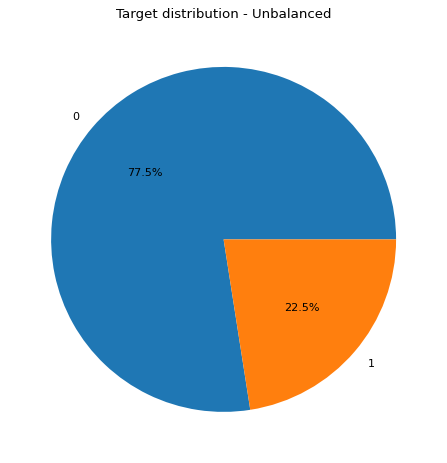

In [ ]:
edatools.plot_piechart_nparray("Target distribution - Unbalanced", y_train_un)

### Create Model, visualize the same, train and observe the history - Target Unbalanced | CNN with 3 Convolution Layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                        

<span style='color:None'>None</span>

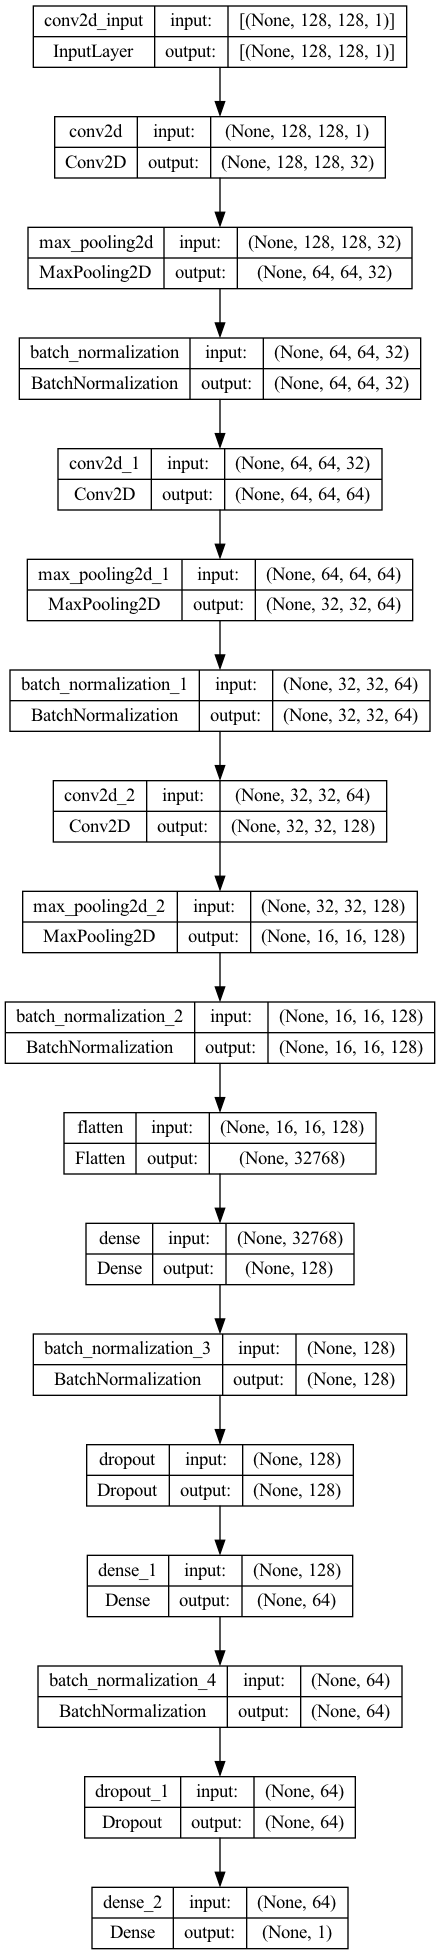

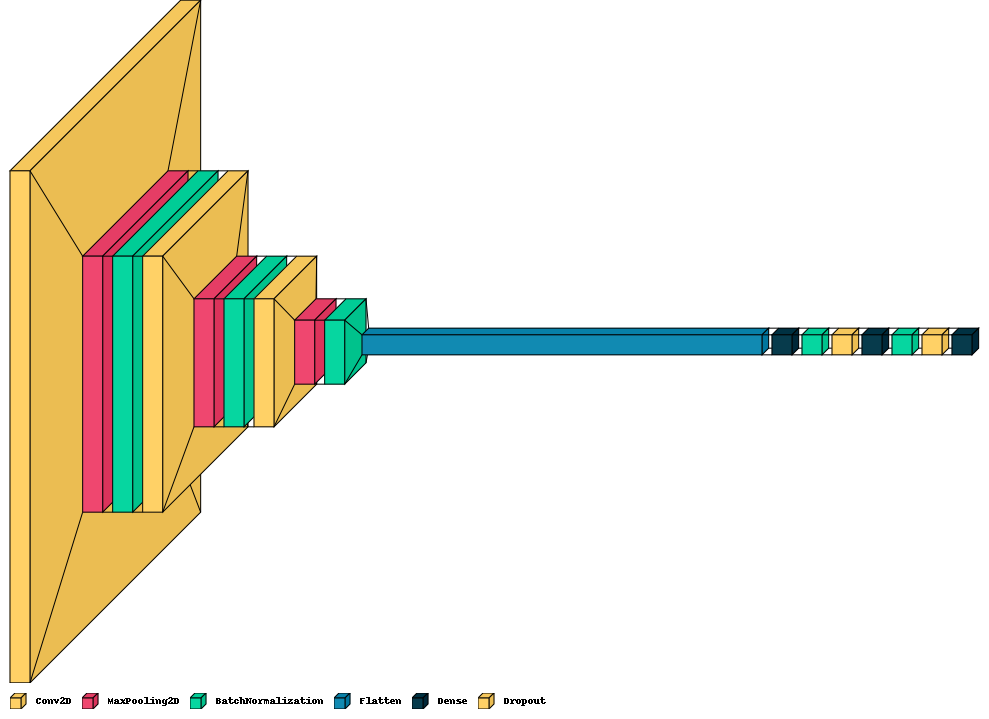

Epoch 1/11


2023-02-15 23:46:00.150184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


501/501 [==============================] - ETA: 0s - loss: 0.5180 - accuracy: 0.7580

2023-02-15 23:46:47.648211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.48302, saving model to cnn3Cl_model_weights_un.h5
501/501 [==============================] - 53s 100ms/step - loss: 0.5180 - accuracy: 0.7580 - val_loss: 0.4830 - val_accuracy: 0.7658 - lr: 0.0010
Epoch 2/11
501/501 [==============================] - ETA: 0s - loss: 0.4470 - accuracy: 0.7942
Epoch 2: val_loss improved from 0.48302 to 0.45017, saving model to cnn3Cl_model_weights_un.h5
501/501 [==============================] - 49s 97ms/step - loss: 0.4470 - accuracy: 0.7942 - val_loss: 0.4502 - val_accuracy: 0.7954 - lr: 0.0010
Epoch 3/11
501/501 [==============================] - ETA: 0s - loss: 0.4351 - accuracy: 0.8001
Epoch 3: val_loss improved from 0.45017 to 0.42518, saving model to cnn3Cl_model_weights_un.h5
501/501 [==============================] - 48s 97ms/step - loss: 0.4351 - accuracy: 0.8001 - val_loss: 0.4252 - val_accuracy: 0.8023 - lr: 0.0010
Epoch 4/11
501/501 [==============================] - ETA: 0s - loss: 0.4274 - accuracy

In [ ]:
#create CNNImageClassifier instance which is a derived class of ImageClassifier
cnn_base_classifier3CL_un = CNNImageClassifier3CL("Target Unbalanced | CNN with 3 Conv Layers",
                                                 'cnn3Cl_model_weights_un.h5',
                                                 train_ds_un, 
                                                 val_ds_un)
_train_classifier(cnn_base_classifier3CL_un)

  1/167 [..............................] - ETA: 47s

2023-02-15 23:54:54.833498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - 4s 21ms/step


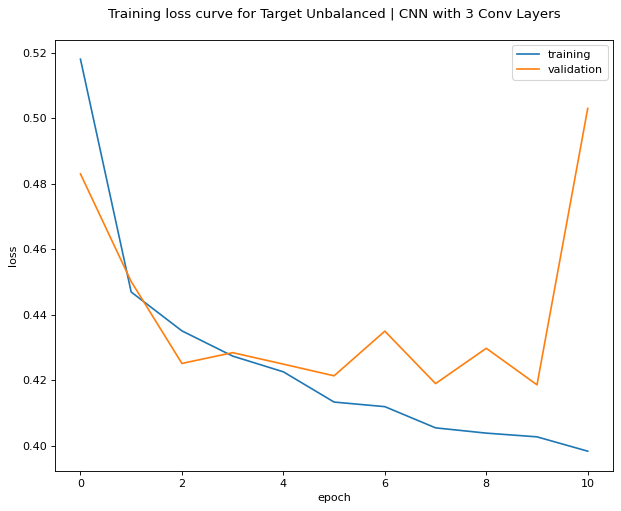

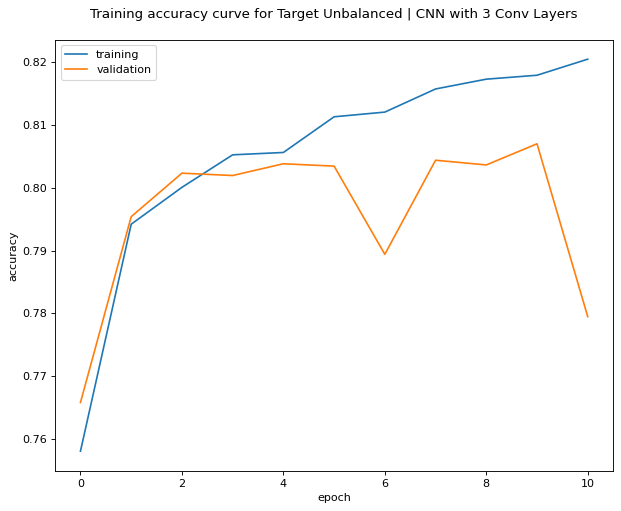

Metrics for Target Unbalanced | CNN with 3 Conv Layers:

Testing Accuracy = 0.7970770095559303

Precision score = 0.6083032490974729

Recall score = 0.2801330008312552

F1 score = 0.3836084234490609

ROC AUC = 0.8045086445312295

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4134
           1       0.61      0.28      0.38      1203

    accuracy                           0.80      5337
   macro avg       0.71      0.61      0.63      5337
weighted avg       0.77      0.80      0.77      5337



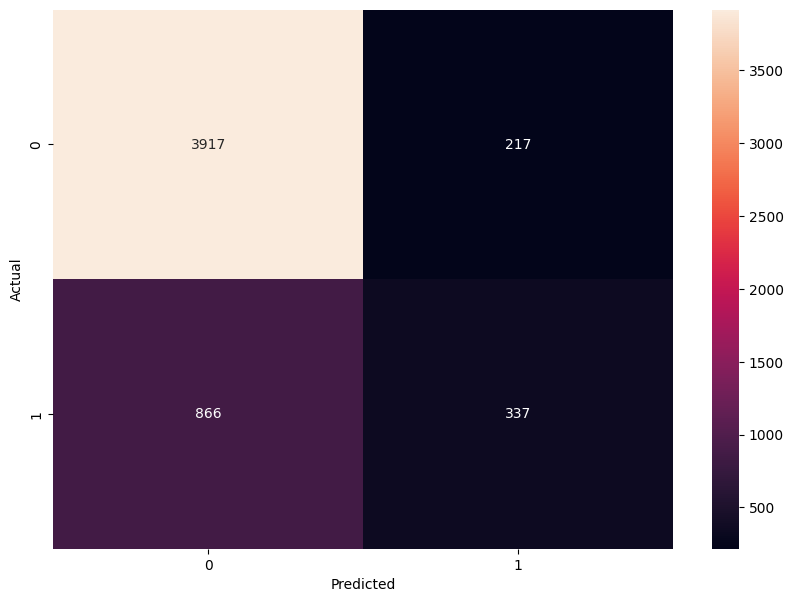

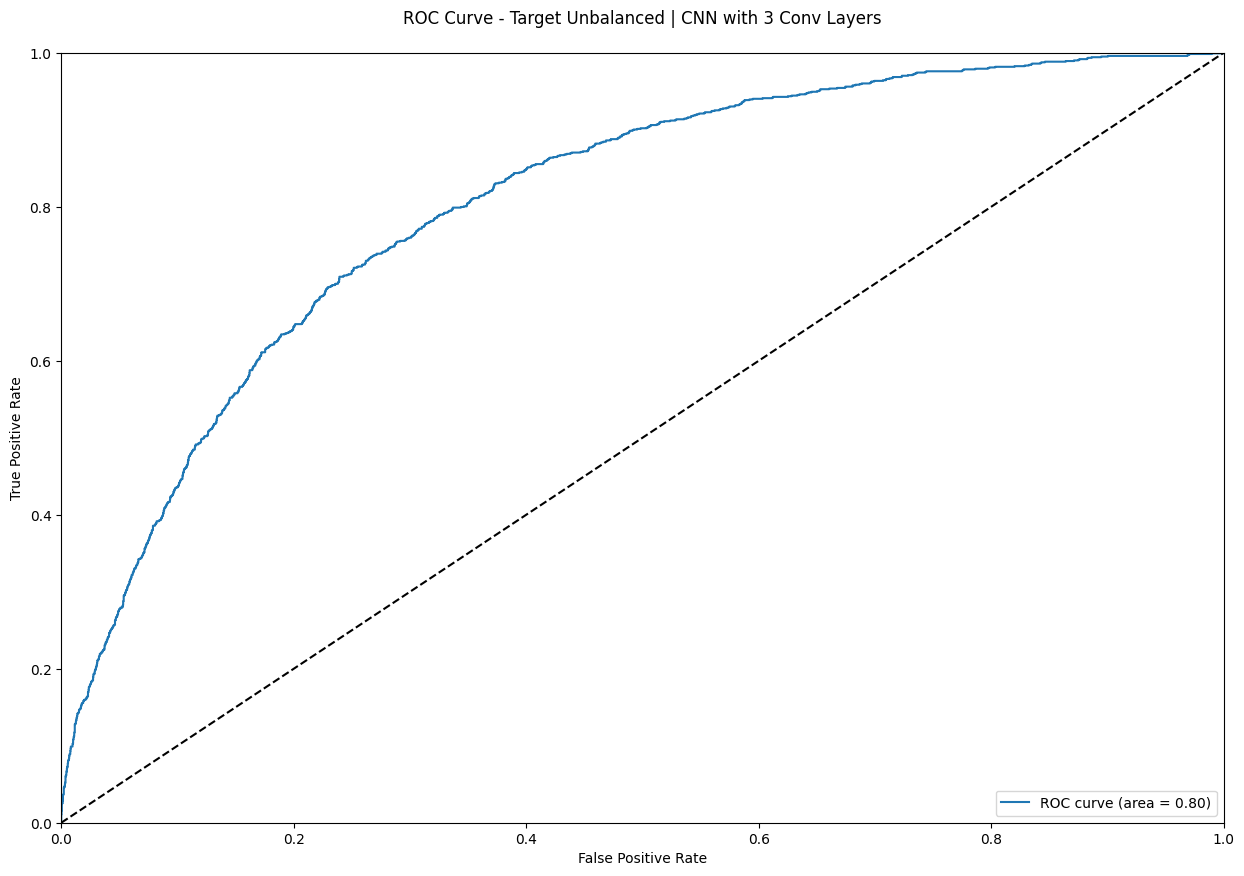

In [ ]:
#load the best saved model
cnn_base_classifier3CL_un.load_saved_model()
_test_classifier(cnn_base_classifier3CL_un, test_ds_un)

### Observations on the base model with data balanced Target Unbalanced | CNN with 3 Convolution Layers

    1. Due to the heavy imbalance of the data, although the testing accuracy is reasonable,
       this model is unacceptable in detecting Pneumonia. This is cause the Recall of
       of Target 1 (Pneumonia detected) is 17% and f1 score is 27%
    2. Recall of Target 0 (No Pneumonia) is 98% and f1 score is 88% but this is of no use to us.
    3. Overall Testing accuracy of 80% and as discussed above, this does not mean much to us as the
       model is not able to detect Pneumonia well at all.
    
**Let us balance the data by undersampling the majority class**
___

### Target Label Ratio 1:1

'Lung Opacity' cases will occupy 50% forming Target 1. 'Normal' and 'No Lung Opacity | Not Normal' will add upto 50% forming Target 0. Further 'Normal' and 'No Lung Opacity | Not Normal' **will NOT be in equal propotions. it will be selected randomly**


In [ ]:
def _get_target_balanced_data():
        df_pruned = pneumonia_data.df_merged_dicom_drop_duplicates
        
        X = df_pruned.drop('Target', axis=1)
        y = df_pruned['Target']
        rus = RandomUnderSampler()
        X_resampled, y_resampled = rus.fit_resample(X, y)
        
        X_train, X_val, y_train, y_val = get_train_test(X_resampled, y_resampled, test_size=0.4)
        X_val, X_test, y_val, y_test = get_train_test(X_val, y_val, test_size=0.5)
        
        return X_train, y_train, X_val, y_val, X_test, y_test
        
X_train_bt, y_train_bt, X_val_bt, y_val_bt, X_test_bt, y_test_bt = _get_target_balanced_data()

In [ ]:
display_shapes(X_train_bt, y_train_bt, X_val_bt, y_val_bt, X_test_bt, y_test_bt)
display_nparray_value_counts("y_train_bt", y_train_bt)
display_nparray_value_counts("y_val_bt", y_val_bt)
display_nparray_value_counts("y_test_bt", y_test_bt)

X_train shape = (7214, 13)

y_train shape = (7214,)

X_val shape   = (2405, 13)

y_val shape   = (2405,)

X_test shape  = (2405, 13)

y_test shape  = (2405,)

y_train_bt unique values = (array([0, 1]), array([3607, 3607]))

y_val_bt unique values = (array([0, 1]), array([1203, 1202]))

y_test_bt unique values = (array([0, 1]), array([1202, 1203]))



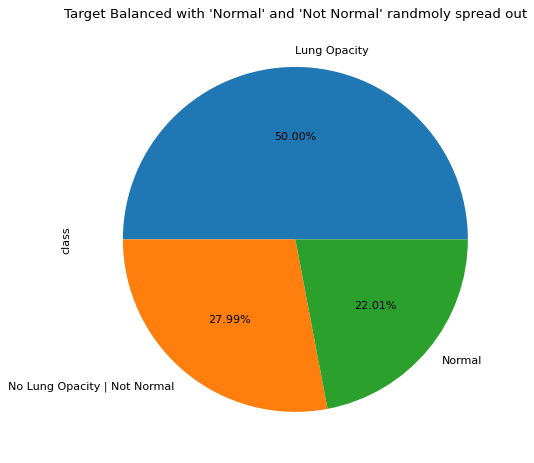

In [ ]:
edatools.plot_piechart("Target Balanced with 'Normal' and 'Not Normal' randmoly spread out", X_train_bt, 
                       'class')

In [ ]:
X_train_bt, y_train_bt, X_val_bt, y_val_bt, X_test_bt, y_test_bt = get_image_labels(X_train_bt, y_train_bt, X_val_bt, y_val_bt, X_test_bt, y_test_bt)
train_ds_bt,  val_ds_bt,  test_ds_bt = get_train_val_test_dataset(X_train_bt, y_train_bt, X_val_bt, y_val_bt, X_test_bt, y_test_bt) 

### Create Model, visualize the same, train and observe the history - Target 1:1 | CNN with 3 Convolution Layers

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                      

<span style='color:None'>None</span>

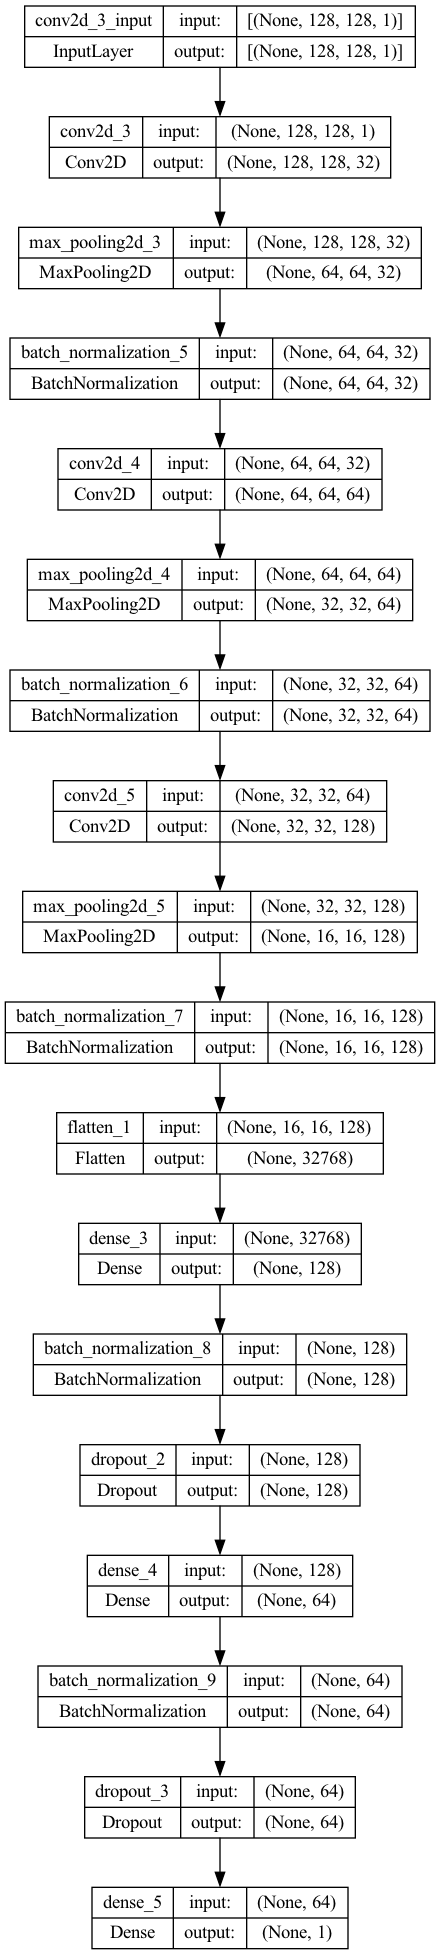

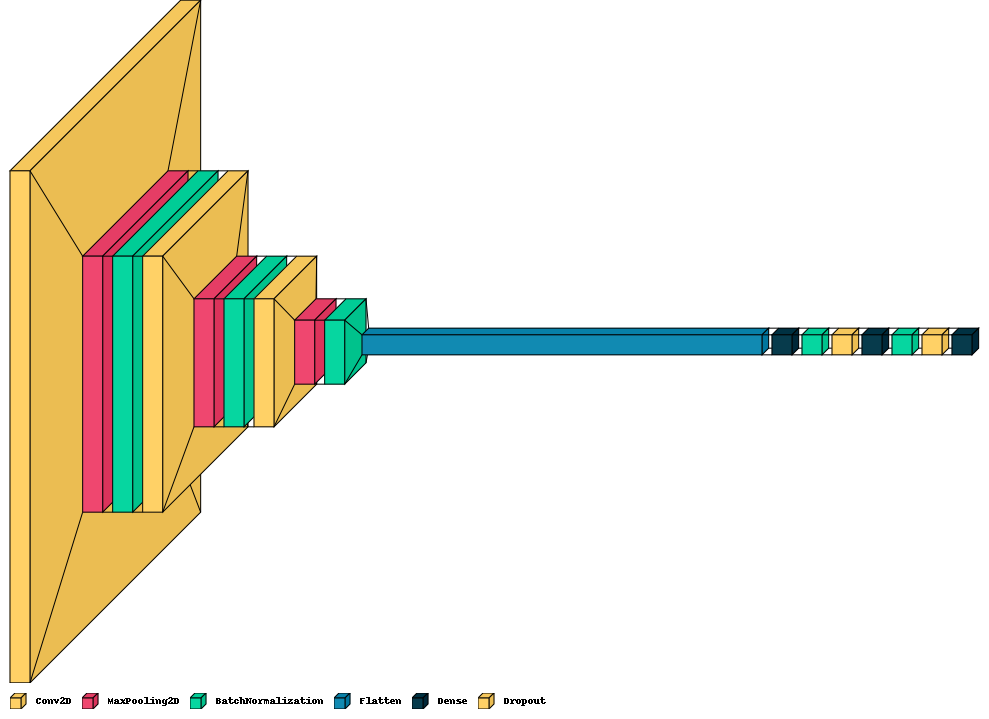

Epoch 1/11


2023-02-15 23:55:00.998866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


226/226 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.6788

2023-02-15 23:55:22.303251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.86875, saving model to cnn3l_model_weights_11.h5
226/226 [==============================] - 25s 100ms/step - loss: 0.6598 - accuracy: 0.6788 - val_loss: 0.8687 - val_accuracy: 0.4998 - lr: 0.0010
Epoch 2/11
226/226 [==============================] - ETA: 0s - loss: 0.5828 - accuracy: 0.7095
Epoch 2: val_loss improved from 0.86875 to 0.80863, saving model to cnn3l_model_weights_11.h5
226/226 [==============================] - 22s 97ms/step - loss: 0.5828 - accuracy: 0.7095 - val_loss: 0.8086 - val_accuracy: 0.4965 - lr: 0.0010
Epoch 3/11
226/226 [==============================] - ETA: 0s - loss: 0.5633 - accuracy: 0.7174
Epoch 3: val_loss improved from 0.80863 to 0.55178, saving model to cnn3l_model_weights_11.h5
226/226 [==============================] - 22s 97ms/step - loss: 0.5633 - accuracy: 0.7174 - val_loss: 0.5518 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 4/11
226/226 [==============================] - ETA: 0s - loss: 0.5523 - accuracy: 0

In [ ]:
#create CNNImageClassifier instance which is a derived class of ImageClassifier
cnn_base_classifier3CL_bt = CNNImageClassifier3CL("Target 1:1 | CNN with 3 Conv Layers",
                                                 'cnn3l_model_weights_11.h5',
                                                 train_ds_bt, 
                                                 val_ds_bt)
_train_classifier(cnn_base_classifier3CL_bt)

2023-02-15 23:59:05.221702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


76/76 [==============================] - 2s 20ms/step


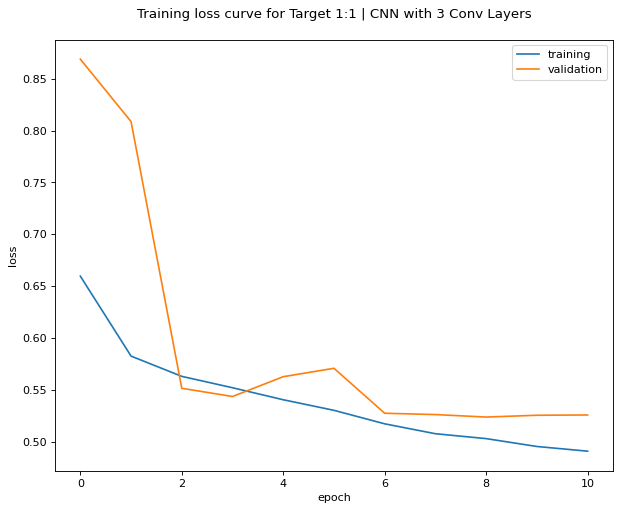

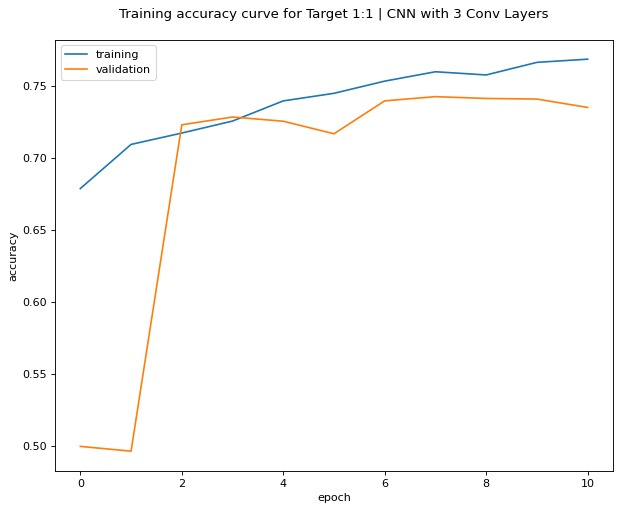

Metrics for Target 1:1 | CNN with 3 Conv Layers:

Testing Accuracy = 0.7538461538461538

Precision score = 0.7399842890809112

Recall score = 0.7830423940149626

F1 score = 0.7609046849757672

ROC AUC = 0.8260325337515889

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1202
           1       0.74      0.78      0.76      1203

    accuracy                           0.75      2405
   macro avg       0.75      0.75      0.75      2405
weighted avg       0.75      0.75      0.75      2405



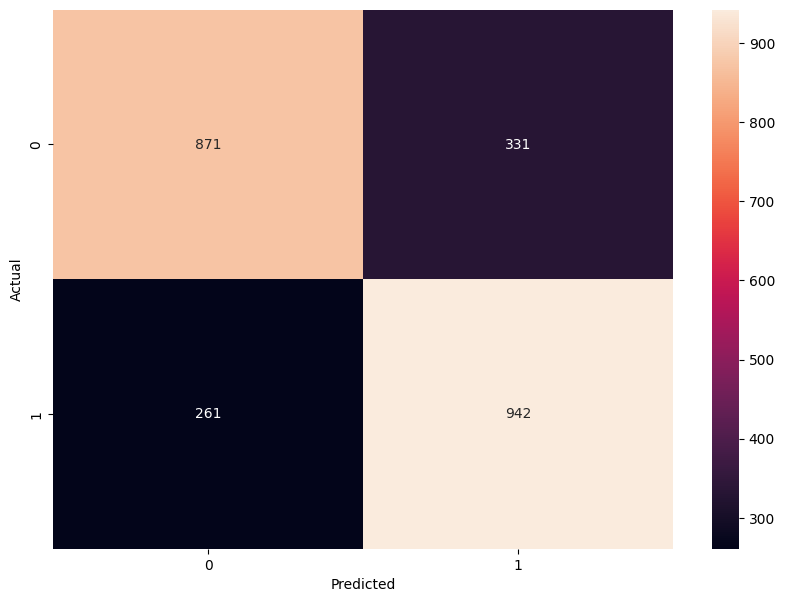

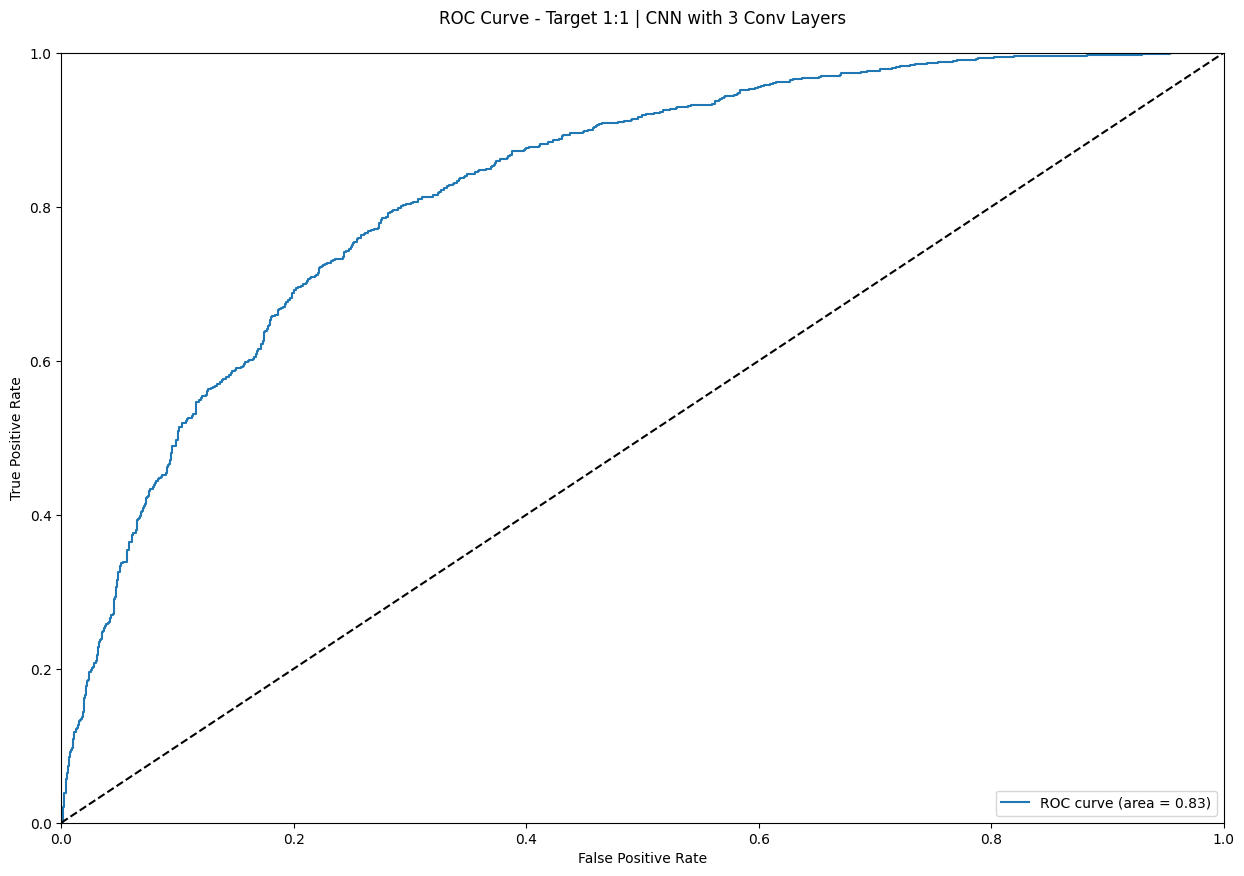

In [ ]:
#load the best saved model
cnn_base_classifier3CL_bt.load_saved_model()
_test_classifier(cnn_base_classifier3CL_bt, test_ds_bt)

### Observations on the base model with data balanced Target 1:1 | CNN with 3 Convolution Layers

    1. Recall of 80% on Target 1 (Pneumonia detected) and 74% Recall on Target 0
    2. F1 score of 78% for Target 1 and 76% for Target 0
    3. Overall Testing accuracy of 77% on unseen data
    4. There are a lot of dips and rises in the loss and accuracy curve suggesting that the solution is missing
       optimal point. Might have to tune the optimizer and or learning rate
    5. ROC area of 0.84
    

### Create Model, visualize the same, train and observe the history - Target 1:1 | CNN with 5 Convolution Layers

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_10 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                      

<span style='color:None'>None</span>

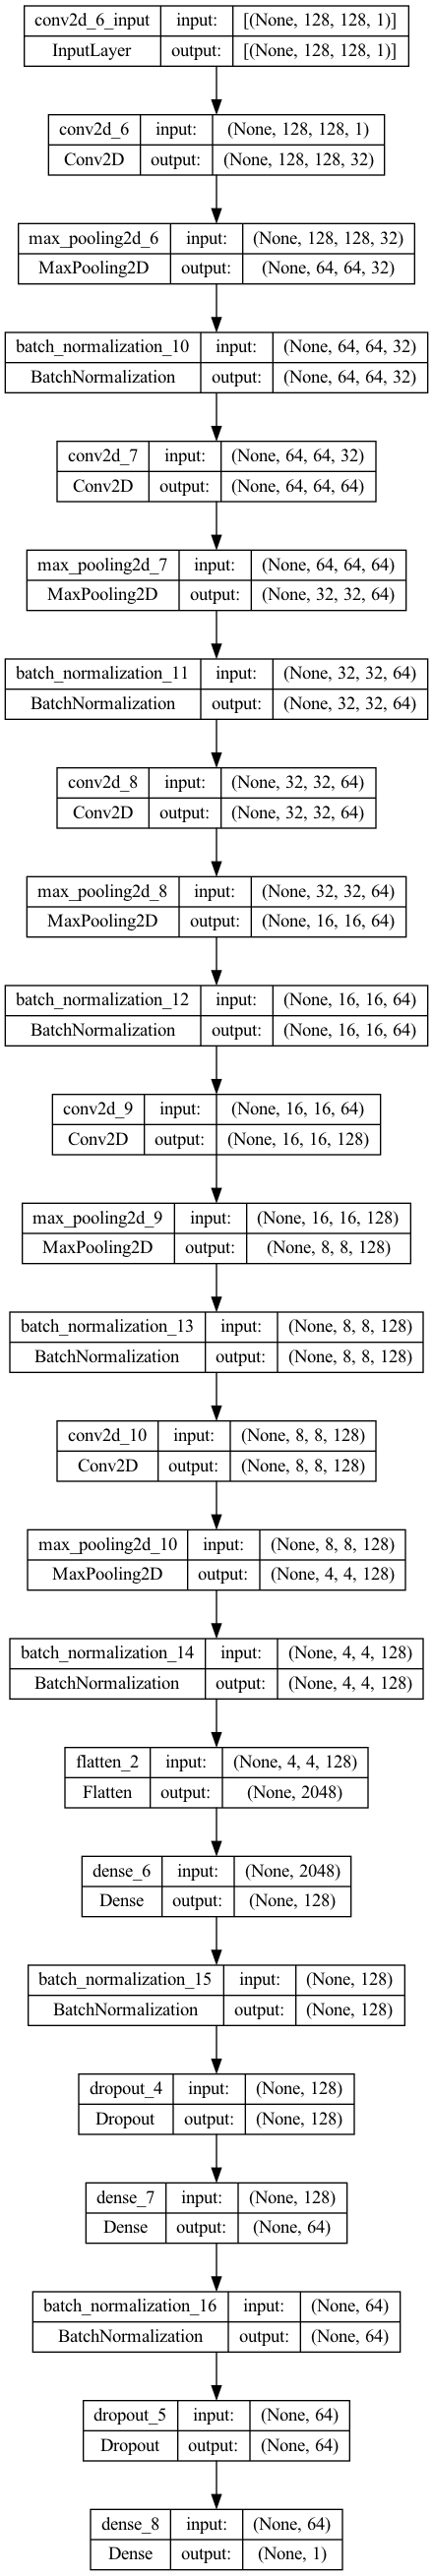

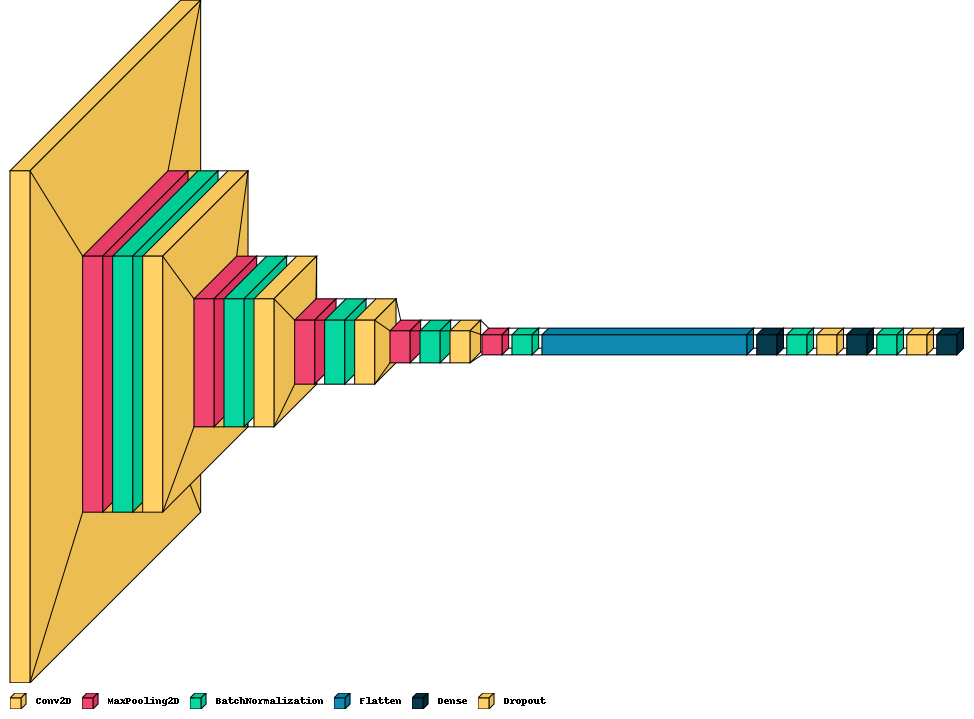

Epoch 1/11


2023-02-15 23:59:09.538256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


226/226 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.6590

2023-02-15 23:59:32.914265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.77276, saving model to cnn5l_model_weights_11.h5
226/226 [==============================] - 27s 108ms/step - loss: 0.6845 - accuracy: 0.6590 - val_loss: 0.7728 - val_accuracy: 0.5002 - lr: 0.0010
Epoch 2/11
226/226 [==============================] - ETA: 0s - loss: 0.5827 - accuracy: 0.7054
Epoch 2: val_loss improved from 0.77276 to 0.63989, saving model to cnn5l_model_weights_11.h5
226/226 [==============================] - 22s 99ms/step - loss: 0.5827 - accuracy: 0.7054 - val_loss: 0.6399 - val_accuracy: 0.6403 - lr: 0.0010
Epoch 3/11
226/226 [==============================] - ETA: 0s - loss: 0.5610 - accuracy: 0.7204
Epoch 3: val_loss improved from 0.63989 to 0.59122, saving model to cnn5l_model_weights_11.h5
226/226 [==============================] - 22s 98ms/step - loss: 0.5610 - accuracy: 0.7204 - val_loss: 0.5912 - val_accuracy: 0.6994 - lr: 0.0010
Epoch 4/11
226/226 [==============================] - ETA: 0s - loss: 0.5446 - accuracy: 0

In [ ]:
#create CNNImageClassifier instance which is a derived class of ImageClassifier
cnn_base_classifier5CL_bt = CNNImageClassifier5CL("Target 1:1 | CNN with 5 Conv Layers",
                                                 'cnn5l_model_weights_11.h5',
                                                 train_ds_bt, 
                                                 val_ds_bt)
_train_classifier(cnn_base_classifier5CL_bt)

### Evaluate the model with the following - Target 1:1 | CNN with 5 Convolution Layers:
    1. Training and Validation loss against epocs
    2. Training and Validation accuracy against epocs
    3. Compute and display Testing accuracy, Precision, Recall, f1 score and rocauc
    4. Display classification report 
    5. Display confusion matrix
    6. Display ROC AUC curve

2023-02-16 00:03:20.718616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


76/76 [==============================] - 2s 20ms/step


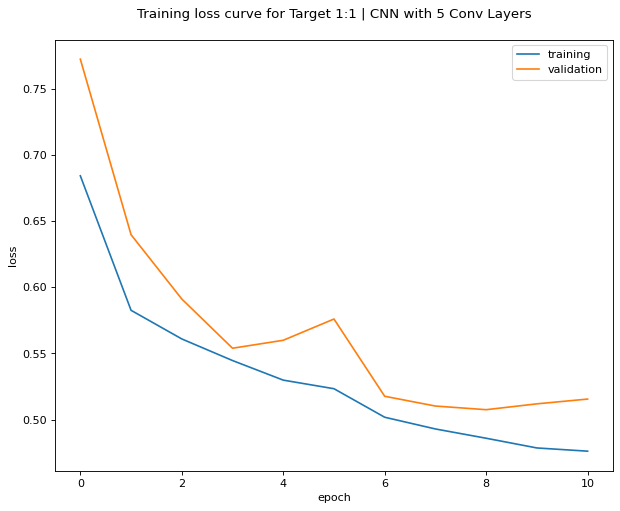

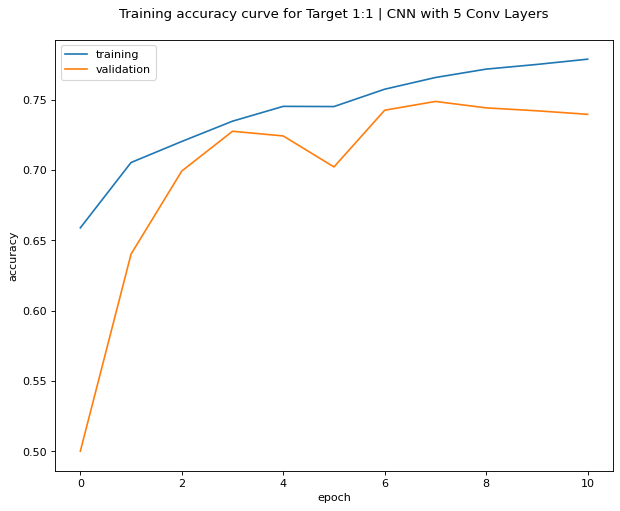

Metrics for Target 1:1 | CNN with 5 Conv Layers:

Testing Accuracy = 0.7667359667359668

Precision score = 0.7588709677419355

Recall score = 0.7822111388196176

F1 score = 0.770364306180925

ROC AUC = 0.8426382739767332

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1202
           1       0.76      0.78      0.77      1203

    accuracy                           0.77      2405
   macro avg       0.77      0.77      0.77      2405
weighted avg       0.77      0.77      0.77      2405



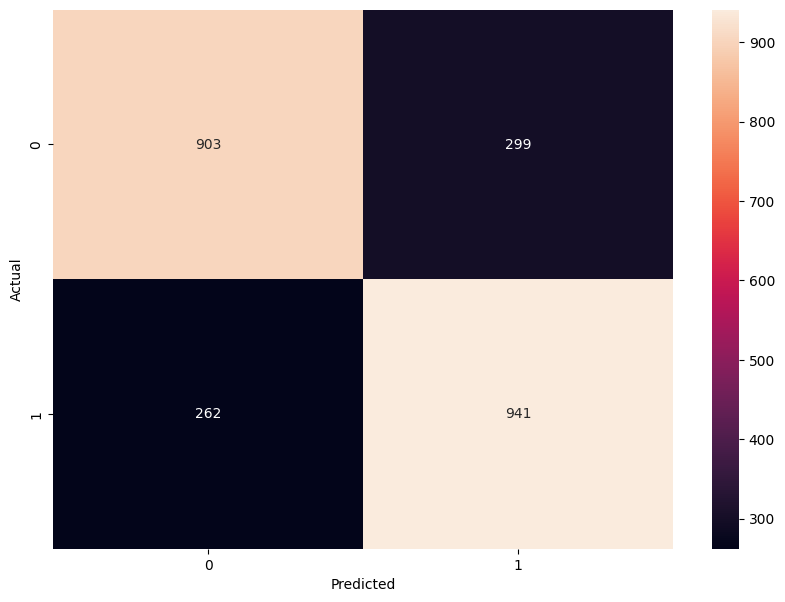

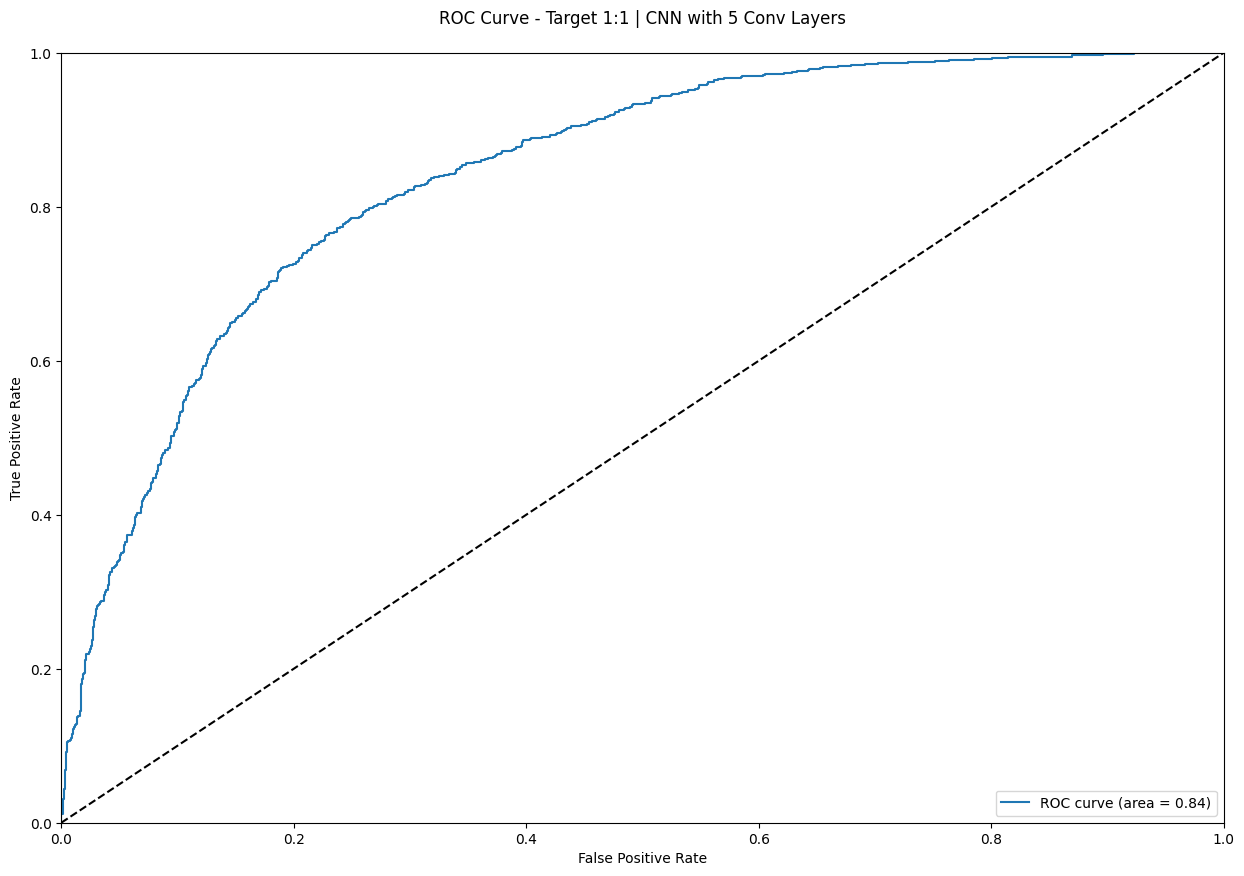

In [ ]:
#load the best saved model
cnn_base_classifier5CL_bt.load_saved_model()
_test_classifier(cnn_base_classifier5CL_bt, test_ds_bt)

### Observations on the base model with data balanced Target 1:1 | CNN with 5 Convolution Layers

    1. Recall of 80% on Target 1 (Pneumonia detected) and 70% Recall on Target 0
    2. F1 score of 76% for Target 1 and 74% for Target 0
    3. Overall Testing accuracy of 75% on unseen data
    4. The Train/val loss and accuracy curve suggests that the model is not overfitting a lot but still
       there are bounces and it's not smooth yet.
    5. For this specific problem, having a higher Recall on detecting the disease (Pneumonia) takes more
       precedence.
    6. ROC area of 0.75. The curve also suggests that the probability threshold should be experimented.
       We will do this in the next step which would be fine tuning the base model
    7. We can observe that this random balancing within Target 0 between 'Normal' and 
       'No Lung Opacity | Not Normal' does not fare better than Class balanced 2:1:1 CNN 5 Layer

### Compare results

In [ ]:
pd.set_option('display.max_colwidth', 100)
def _get_comparative_metrics(models):
    model_names = []
    testing_accuracy = []
    precision = []
    recall = []
    f1 = []
    rocauc = []
    wt_precision = []
    wt_recall = []
    wt_f1 = []
    
    for model in models:
        if model.metrics:
            model_names.append(model.name)
            testing_accuracy.append(model.metrics['testing_accuracy'])
            precision.append(model.metrics['precision'])
            recall.append(model.metrics['recall'])
            f1.append(model.metrics['f1'])
            rocauc.append(model.metrics['roc_auc'])
            wt_precision.append(model.metrics['wt_precision'])
            wt_recall.append(model.metrics['wt_recall'])
            wt_f1.append(model.metrics['wt_f1'])
        
    col_names = ['name', 'testing acuracy', 'precision', 'recall', 'f1', 'rocauc', 'weighted precision', 'weighted recall', 'weighted f1']
    data = {'name': model_names, 'testing acuracy': testing_accuracy, 'precision': precision, 'name': model_names, 'recall': recall, 'f1': f1, 'rocauc': rocauc, 'weighted precision': wt_precision, 'weighted recall': wt_recall, 'weighted f1': wt_f1}

    df = pd.DataFrame(data, columns=col_names)
    
    return df
            

In [ ]:
models = [cnn_base_classifier3CL_un, cnn_base_classifier3CL_bt, cnn_base_classifier5CL_bt]
df_cnn_comparision = _get_comparative_metrics(models)
df_cnn_comparision.round(2)

name  testing acuracy  precision  \
0  Target Unbalanced | CNN with 3 Conv Layers             0.80       0.61   
1         Target 1:1 | CNN with 3 Conv Layers             0.75       0.74   
2         Target 1:1 | CNN with 5 Conv Layers             0.77       0.76   

   recall    f1  rocauc  weighted precision  weighted recall  weighted f1  
0    0.28  0.38    0.80                0.77             0.80         0.77  
1    0.78  0.76    0.83                0.75             0.75         0.75  
2    0.78  0.77    0.84                0.77             0.77         0.77

**Observations on the comparative study**

    1. The above scores are for Target 1 as its a binary classification problem
    
    2. With classification report for each model , it is evident that the CNN with 5 Conv layers
       and data balanced with class ration 2:1:1 is well suited to balance predictions on both 
       Target 1 and Target 0
       
    3. The f1 score for Target 0 in case of CNN5 Class ratio of 2:1:1 is 76% and higher than other
       combinations.
       
    4. We will this use CNN 5 layer with data class balanced in 2:1:1 for further fine tuning

## Storing the variables to access in subsequent notebooks

In [ ]:
#Final dataframe that can be used for bounding box detection
pneumonia_data.df_merged_dicom.to_csv('pneumonia_data.csv', index=False)
#Final dataframe that can be used for CNN image classification. This has duplicates removed
pneumonia_data.df_merged_dicom_drop_duplicates.to_csv('pneumonia_data_no_duplicates.csv', index=False)
#Comparative result dataframe
df_cnn_comparision.to_csv('cnn_comparative_metrics.csv', index=False)

## Summary

In the first phase of the project we did the following steps:

    1. Imported the CSV of Target and Class and merged them based on patientIds.
    2. Iterated through images and mapped the same to the corresponding patientIds
    3. Parsed through the Dicom images and added extra metadata into the dataframe.
    4. Made a final dataframe by combining fields across multiple csv , image metadata and finally the
       image vector itself after pre-processing.
    5. EDA was done on the above.
    6. Visualized various Xray images belonging to the 3 classes and also displayed the bounding box
       when Pneumonia was detected.
    7. Balanced the data by Undersampling the majority class and maintained a 1:1 Target 1 to Target 0 ratio.
       Internally as Target 0 has 2 sub classes 'Normal' and 'Not Normal', further this was split
       into 2:1:1 -> 'Lung Opacity' : 'Normal' : 'Not Normal'
    8. The data was prepared as Train, Val and Test
    9. Basic CNN with 3 and 5 layers were built and the model was evaulated for Test accuracy, Precision, Recall,
       f1 socre, rocauc
    10. It was found that the 5 Convolution layer CNN fared better than the 3 Convolution layer CNN with a well
        rounded f1 and recall for both classes. Although the 3 layer Convolution model has a higher recall for
        Target 1. We can improve this with the 5 layer model in the next phase of the project
    11. It was also found that CNN with 5 Convolution layers and with data class balanced in 2:1:1 performed
        bettern than others
    12. Storing the relevant data to be used in subsequent notebooks for Milestone-2

## Next Steps
Here are the next steps in the next phase of this project:

    1. Fine tune the CNN model defined above to get a more smoother loss curve for example and hopefully
       better fitting one. Hyper paramater tuning including finding the optimal probability threshold.
       
    2. We will also try and improve accuracy by using image augmentation of the class 'Lung Opacity'
    
    3. We will try and see if we can narrow down on actual lung area and cropping the original image
       
    4. Check with various transfer learning algorithms.
    
    4. Implement RCNN to predict bounding box as well as classification
    
    5. Implement UNET
    
    6. Clickable UI for prediction
    
    